<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 1: Data Analysis of Singapore Rainfall

## Background

According to the [Meteorological Services Singapore](http://www.weather.gov.sg/climate-climate-of-singapore/#:~:text=Singapore%20is%20situated%20near%20the,month%2Dto%2Dmonth%20variation.), Singapore has typical tropical climate with adundant rainfall, high and uniform temperatures and high humidity all year round, since its situated near the equator. There are many factors that help us understand the climate of a country and in this project we are going to look into a few, especially rainfall.

Singapore’s climate is characterised by two main monsoon seasons separated by inter-monsoonal periods.  The **Northeast Monsoon** occurs from December to early March, and the **Southwest Monsoon** from June to September.

The major weather systems affecting Singapore that can lead to heavy rainfall are:

-Monsoon surges, or strong wind episodes in the Northeast Monsoon flow bringing about major rainfall events;

-Sumatra squalls, an organised line of thunderstorms travelling eastward across Singapore, having developed over the island of Sumatra or Straits of Malacca west of us;

-Afternoon and evening thunderstorms caused by strong surface heating and by the sea breeze circulation that develops in the afternoon.

Singapore’s climate station has been located at several different sites in the past 140 years. The station had been decommissioned at various points in the past due to changes to local land use in the site’s vicinity, and had to be relocated. Since 1984, the climate station has been located at **Changi**.

There are other metrics of climate such as temperature, humidity, sun shine duration, wind speed, cloud cover etc. All the dataset used in the project comes from [data.gov.sg](data.gov.sg), as recorded at the Changi climate station 


### Choose your Data

There are 2 datasets included in the [`data`](./data/) folder for this project. These correponds to rainfall information. 

* [`rainfall-monthly-number-of-rain-days.csv`](./data/rainfall-monthly-number-of-rain-days.csv): Monthly number of rain days from 1982 to 2022. A day is considered to have “rained” if the total rainfall for that day is 0.2mm or more.
* [`rainfall-monthly-total.csv`](./data/rainfall-monthly-total.csv): Monthly total rain recorded in mm(millimeters) from 1982 to 2022

Other relevant weather datasets from [data.gov.sg](data.gov.sg) that you can download and use are as follows:

* [Relative Humidity](https://data.gov.sg/dataset/relative-humidity-monthly-mean)
* [Monthly Maximum Daily Rainfall](https://data.gov.sg/dataset/rainfall-monthly-maximum-daily-total)
* [Hourly wet buld temperature](https://data.gov.sg/dataset/wet-bulb-temperature-hourly)
* [Monthly mean sunshine hours](https://data.gov.sg/dataset/sunshine-duration-monthly-mean-daily-duration)
* [Surface Air Temperature](https://data.gov.sg/dataset/surface-air-temperature-mean-daily-minimum)

You can also use other datasets for your analysis, make sure to cite the source when you are using them

The datasets choosen for this project are:   
[Historical data: Straits Times Index - Singapore](https://stooq.com/q/d/?s=%5Esti&c=0&d1=19821228&d2=20230130&l=11&i=m)  
[rainfall-monthly-number-of-rain-days](https://data.gov.sg/dataset/rainfall-monthly-number-of-rain-days)  
[rainfall-monthly-total](https://data.gov.sg/dataset/rainfall-monthly-total)   
[sunshine-monthly-mean](https://data.gov.sg/dataset/sunshine-duration-monthly-mean-daily-duration)   
[monthly-surafce-air-temp-mean](https://data.gov.sg/dataset/surface-air-temperature-monthly-mean)   

### Contents:
- [Background](#Background)
- [Data Import & Cleaning](#Data-Import-and-Cleaning)
- [Data Dictionary](#Data_Dictionary)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Data Visualization](#Data-visualisation)
- [Conclusions and Recommendations](#Conclusions-and-Recommendations)

## Problem Statement

Weather is an important part of our daily lives. The rainfall, sun shine hours, temperature etc., both reflects what we did to the environment and also affects how we go about our daily lives. Some seemingly unconnected things may seem correlated. Some correlation may happen by pure chance.  
So looking at the weather data of Singapore, as a data analyst, I am interested to know:  
- Does the Straits Time Index (STI) value at the end of every month have any correlations at all?  
- If so, did they happen by pure chance?  

### Outside Research

STI value and weather may seem very far fecthed, but they might actually be correlated.  
This is because of 3 points:
 - Firstly, [economic activities and energy consumption are very closely tied together](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC9328951/).  
 - Secondly, [energy consumptions/ transports are very closely tied to carbon/ greenhouse gas production](https://www.epa.gov/ghgemissions/sources-greenhouse-gas-emissions#:~:text=Human%20activities%20are%20responsible%20for,over%20the%20last%20150%20years.&text=The%20largest%20source%20of%20greenhouse,electricity%2C%20heat%2C%20and%20transportation.).  
 - Thridly, [greenhouse gases causes climate change, which causes extreme weather patterns](https://earthjustice.org/features/how-climate-change-is-fueling-extreme-weather).  

My goal for this project it to examine the weather features, and if they have any possible, none random relationship with the STI value.

### Coding Challenges

1. Manually calculate mean:

    Write a function that takes in values and returns the mean of the values. Create a list of numbers that you test on your function to check to make sure your function works!
    
    *Note*: Do not use any mean methods built-in to any Python libraries to do this! This should be done without importing any additional libraries.

In [1]:
def cal_mean(val_lst):
    '''
    Calculates the mean of given input list
    args:
    val_lst (list): numbers to calculate mean
    return:
    (float): mean value of input numbers
    '''
    return float(sum(val_lst)/len(val_lst))

In [2]:
assert cal_mean([5]) == 5
assert cal_mean([1,2,3]) == 2
assert cal_mean([3.3,3.3,3.3,3.3]) == 3.3

2. Manually calculate standard deviation:

    The formula for standard deviation is below:

    $$\sigma = \sqrt{\frac{1}{n}\sum_{i=1}^n(x_i - \mu)^2}$$

    Where $x_i$ represents each value in the dataset, $\mu$ represents the mean of all values in the dataset and $n$ represents the number of values in the dataset.

    Write a function that takes in values and returns the standard deviation of the values using the formula above. Hint: use the function you wrote above to calculate the mean! Use the list of numbers you created above to test on your function.
    
    *Note*: Do not use any standard deviation methods built-in to any Python libraries to do this! This should be done without importing any additional libraries.

In [3]:
def std_dev(x_lst):
    '''
    Calculate the POPULATION standard deviation of numbers
    args:
    x_lst (list): list of int or float to calculate thier standard deviation
    return:
    sig (float): standard deviation of input numbers
    '''
    miu = cal_mean(x_lst)
    n = len(x_lst)
    delta = [((x-miu)**2) for x in x_lst]
    sig = (sum(delta)/n)**(0.5)
    return sig

In [4]:
import statistics
assert std_dev([1,2,3,4,5]) == statistics.pstdev([1,2,3,4,5])

--- 
# Part 2

Part 2 requires knowledge of Pandas, EDA, data cleaning, and data visualization.

---

*All libraries used should be added here*

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
from sklearn.preprocessing import MinMaxScaler

In [6]:
# Notebook settings
pd.set_option("display.max_columns", None)

## Data Import and Cleaning

---


Content in data import and cleaning

- [import weather data](#Import-weather-data)
- [add additional data](#Add-additional-data)
- [combine weather data](#Combine-weather-data)
- [change data type](#Change-data-type)
- [import additional data](#Additional-data-import)
- [combine weather and sti data](#Combine-the-data-togther)

---

### Import weather data

In this sub section, all weather data are imported, displayed and the datatype and size of dataframe are examined

### For all weather related .csv files
Steps:
1. Display the data: print the first 5 rows of each dataframe to your Jupyter notebook.
2. Check for missing values and datatype.
3. Check for any obvious issues with the observations.
4. Fix any errors you identified in steps 2-3.

In [7]:
# Read and display the data for number of rainy days
rainy_days_df = pd.read_csv('../data/rainfall-monthly-number-of-rain-days.csv')
rainy_days_df.head()

,month,no_of_rainy_days
0,1982-01,10
1,1982-02,5
2,1982-03,11
3,1982-04,14
4,1982-05,10


In [8]:
# Check for null values
rainy_days_df.isnull().sum()

month               0
no_of_rainy_days    0
dtype: int64

In [9]:
# Check for anomalies
# Check for simple stats figure
display(rainy_days_df.describe())
# Check for data types
rainy_days_df.info()

,no_of_rainy_days
count,488.000000
mean,14.061475
std,4.947394
min,1.000000
25%,11.000000
50%,14.000000
75%,18.000000
max,27.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 488 entries, 0 to 487
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   month             488 non-null    object
 1   no_of_rainy_days  488 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 7.8+ KB


In [10]:
# Change to datetime
# rainy_days_df['month'] = pd.to_datetime(rainy_days_df['month'])
# rainy_days_df['year'] = pd.DatetimeIndex(rainy_days_df['month']).year
# rainy_days_df['month'] = pd.DatetimeIndex(rainy_days_df['month']).month
# rainy_days_df = rainy_days_df[['year', 'month', 'no_of_rainy_days']]
display(rainy_days_df.head())
display(rainy_days_df.describe())
rainy_days_df.info()

,month,no_of_rainy_days
0,1982-01,10
1,1982-02,5
2,1982-03,11
3,1982-04,14
4,1982-05,10


,no_of_rainy_days
count,488.000000
mean,14.061475
std,4.947394
min,1.000000
25%,11.000000
50%,14.000000
75%,18.000000
max,27.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 488 entries, 0 to 487
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   month             488 non-null    object
 1   no_of_rainy_days  488 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 7.8+ KB


In [11]:
# Process the rainfall-monthly-total.csv data
rainfall_total_df = pd.read_csv('../data/rainfall-monthly-total.csv')
display(rainfall_total_df.head())
display(rainfall_total_df.info())

,month,total_rainfall
0,1982-01,107.1
1,1982-02,27.8
2,1982-03,160.8
3,1982-04,157.0
4,1982-05,102.2


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 488 entries, 0 to 487
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   month           488 non-null    object 
 1   total_rainfall  488 non-null    float64
dtypes: float64(1), object(1)
memory usage: 7.8+ KB


None

In [12]:
# rainfall_total_df['month'] = pd.to_datetime(rainfall_total_df['month'])
# rainfall_total_df['year'] = pd.DatetimeIndex(rainfall_total_df['month']).year
# rainfall_total_df['month'] = pd.DatetimeIndex(rainfall_total_df['month']).month
# rainfall_total_df = rainfall_total_df[['year', 'month', 'total_rainfall']]
display(rainfall_total_df.describe())
rainfall_total_df.info()

,total_rainfall
count,488.000000
mean,177.163730
std,113.916029
min,0.200000
25%,93.850000
50%,159.450000
75%,238.075000
max,765.900000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 488 entries, 0 to 487
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   month           488 non-null    object 
 1   total_rainfall  488 non-null    float64
dtypes: float64(1), object(1)
memory usage: 7.8+ KB


In [13]:
# Process the sunshin-monthly-mean.csv data
sunshine_df = pd.read_csv('../data/sunshine-monthly-mean.csv')
# sunshine_df['month'] = pd.to_datetime(sunshine_df['month'])
display(sunshine_df.head())
display(sunshine_df.info())

,month,mean_sunshine_hrs
0,1982-01,5.6
1,1982-02,7.6
2,1982-03,5.1
3,1982-04,4.7
4,1982-05,5.8


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 490 entries, 0 to 489
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   month              490 non-null    object 
 1   mean_sunshine_hrs  490 non-null    float64
dtypes: float64(1), object(1)
memory usage: 7.8+ KB


None

In [14]:
surface_temp_df = pd.read_csv('../data/monthly-surafce-air-temp-mean.csv')
display(surface_temp_df.head())
display(surface_temp_df.info())
display(surface_temp_df.describe())

,month,mean_temp
0,1982-01,25.9
1,1982-02,27.1
2,1982-03,27.2
3,1982-04,27.0
4,1982-05,28.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 490 entries, 0 to 489
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   month      490 non-null    object 
 1   mean_temp  490 non-null    float64
dtypes: float64(1), object(1)
memory usage: 7.8+ KB


None

,mean_temp
count,490.000000
mean,27.679184
std,0.800623
min,25.400000
25%,27.100000
50%,27.700000
75%,28.300000
max,29.500000


### Add additional data

In this subsection, additoanl data are added as there are 'missing' data.

* observation: The total data entry for sunshine is 490, while rainfall is only 488?
---
Why is that so? The most likely reason is that the given datasets are outdated.
To confirm this theory, compare the datasets.

In [15]:
sunshine_df.tail(4)

,month,mean_sunshine_hrs
486,2022-07,6.2
487,2022-08,5.5
488,2022-09,3.8
489,2022-10,3.5


In [16]:
display(rainfall_total_df.tail(2))
display(rainy_days_df.tail(2))

,month,total_rainfall
486,2022-07,145.2
487,2022-08,141.4


,month,no_of_rainy_days
486,2022-07,16
487,2022-08,15


---
`sunshine_df` included information for Sep 22 and Oct 22, while `rainfall_total_df` and `rainy_days_df` doesn't.  
This shows that additional information is not added to the 2 data sets. Manual addition can be done.
Viewing from [data.gov.sg](https://data.gov.sg/) the following results are observed.  

<img src='../img/rain_amt.png' alt="Screen shot of total rain ammount for Sep and Oct 2022">

<img src='../img/rain_days.png' alt="Screen shot of number of rain days for Sep and Oct 2022">

In [17]:
extra_rainfall = {"month" : ['2022-09', '2022-10'], "total_rainfall": [121, 280]}
extra_rainfall = pd.DataFrame(extra_rainfall)
# extra_rainfall
rainfall_total_df = pd.concat([rainfall_total_df, extra_rainfall], ignore_index = True)
rainfall_total_df.tail()

,month,total_rainfall
485,2022-06,211.8
486,2022-07,145.2
487,2022-08,141.4
488,2022-09,121.0
489,2022-10,280.0


In [18]:
extra_rain_days = {"month" : ['2022-09', '2022-10'], "no_of_rainy_days": [14, 27]}
extra_rain_days = pd.DataFrame(extra_rain_days)
# extra_rain_days
rainy_days_df = pd.concat([rainy_days_df, extra_rain_days], ignore_index = True)
rainy_days_df.tail()

,month,no_of_rainy_days
485,2022-06,17
486,2022-07,16
487,2022-08,15
488,2022-09,14
489,2022-10,27


Looking at the information, all 490 entries are not null.
Step:  
4. Fix any errors you identified in steps 2-3.  
is completed.
Proceed to process with the rest of the steps.

### Combine weather data

Now all three DataFrame containing weather information are the same, we can combine the three DataFrame together for data cleaning and manipulation.  

5. Merge dataframes that can be merged.  
     - Since different climate metrics are in month format, we can merge them into one single dataframe for easier analysis 
     
-----------------------------

In [19]:
# make a master DataFrame of weather data, named 'weather_data_df'
weather_data_df = rainy_days_df.merge(rainfall_total_df, how='inner')
weather_data_df = weather_data_df.merge(sunshine_df, how='inner')
weather_data_df = weather_data_df.merge(surface_temp_df, how='inner')
weather_data_df.head()

,month,no_of_rainy_days,total_rainfall,mean_sunshine_hrs,mean_temp
0,1982-01,10,107.1,5.6,25.9
1,1982-02,5,27.8,7.6,27.1
2,1982-03,11,160.8,5.1,27.2
3,1982-04,14,157.0,4.7,27.0
4,1982-05,10,102.2,5.8,28.0


In [20]:
weather_data_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 490 entries, 0 to 489
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   month              490 non-null    object 
 1   no_of_rainy_days   490 non-null    int64  
 2   total_rainfall     490 non-null    float64
 3   mean_sunshine_hrs  490 non-null    float64
 4   mean_temp          490 non-null    float64
dtypes: float64(3), int64(1), object(1)
memory usage: 23.0+ KB


Now, we see that the `month` column is an object.    
This is probably because the column is made of string.  
In order to process this column by tapping on the very powerful Python packages, I prefer converting it to `datetime`.  
Also note that all columns are currently lower case and using underscores.  
This means:  

6. Rename Columns.
    - Column names should be all lowercase.  
    - Column names should not contain spaces (underscores will suffice--this allows for using the `df.column_name` method to access columns in addition to `df['column_name']`).  
    - Column names should be unique and informative.  

is completed.

### Change data type

The remaining steps are:
    
7. Fix any incorrect data types found in step 5.
    - Fix any individual values preventing other columns from being the appropriate type.
    - If the month column data is better analyzed as month and year, create new columns for the same
8. Drop unnecessary rows (if needed).
9. Perform any additional cleaning that is necessary.
10. Save cleaned and merged dataframes as csv files.

In [21]:
# converts the 'month' obj into datetime class
weather_data_df['month'] = pd.to_datetime(weather_data_df['month'])
# Split the year and month of the data
weather_data_df['year'] = pd.DatetimeIndex(weather_data_df['month']).year
weather_data_df['month_in_yr'] = pd.DatetimeIndex(weather_data_df['month']).month
# drop the month column
weather_data_df.drop(columns=['month'], inplace=True)
weather_data_df.head()

,no_of_rainy_days,total_rainfall,mean_sunshine_hrs,mean_temp,year,month_in_yr
0,10,107.1,5.6,25.9,1982,1
1,5,27.8,7.6,27.1,1982,2
2,11,160.8,5.1,27.2,1982,3
3,14,157.0,4.7,27.0,1982,4
4,10,102.2,5.8,28.0,1982,5


With this, we have completed steps:  

7. Fix any incorrect data types found in step 5.
    - Fix any individual values preventing other columns from being the appropriate type.
    - If the month column data is better analyzed as month and year, create new columns for the same
8. Drop unnecessary rows (if needed).

Also, there are no additional cleaning to be done:
So data cleaning can be completed with the last 2 steps:  

9. Perform any additional cleaning that is necessary.
10. Save cleaned and merged dataframes as csv files.

In [22]:
# Now, we adjust the columns to a more reader friendly format
cols = weather_data_df.columns.tolist()
cols = cols[-2:] + cols[0:4]
weather_data_df = weather_data_df[cols]
weather_data_df.head()

,year,month_in_yr,no_of_rainy_days,total_rainfall,mean_sunshine_hrs,mean_temp
0,1982,1,10,107.1,5.6,25.9
1,1982,2,5,27.8,7.6,27.1
2,1982,3,11,160.8,5.1,27.2
3,1982,4,14,157.0,4.7,27.0
4,1982,5,10,102.2,5.8,28.0


In [23]:
weather_data_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 490 entries, 0 to 489
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   year               490 non-null    int64  
 1   month_in_yr        490 non-null    int64  
 2   no_of_rainy_days   490 non-null    int64  
 3   total_rainfall     490 non-null    float64
 4   mean_sunshine_hrs  490 non-null    float64
 5   mean_temp          490 non-null    float64
dtypes: float64(3), int64(3)
memory usage: 26.8 KB


In [24]:
weather_data_df.to_csv('../data/weather_data.csv',index=False)

### Additional data import


Now we import additional data, so we can do some analysis by combining it with our weather data.

In [25]:
sti_df = pd.read_csv('../data/sti_m.csv')
display(sti_df.head())
sti_df.info()

,Date,Open,High,Low,Close
0,31/12/1987,824.4,824.4,810.9,823.2
1,31/1/1988,833.6,924.1,833.6,908.9
2,29/2/1988,892.0,901.7,851.8,888.8
3,31/3/1988,890.3,969.5,890.3,925.8
4,30/4/1988,926.8,965.4,926.8,965.4


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421 entries, 0 to 420
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    421 non-null    object 
 1   Open    421 non-null    float64
 2   High    421 non-null    float64
 3   Low     421 non-null    float64
 4   Close   421 non-null    float64
dtypes: float64(4), object(1)
memory usage: 16.6+ KB


As this is monthly data of how Strait Times Index performed on the last day of every month, some data manipulation must be done.  
- The colmun titles need to be converted to lower case.
- The date need to be changed to datetime and then year and month

In [26]:
cols = sti_df.columns.tolist()
cols_lower = [name.lower() for name in cols]
mapper = {key: value for key, value in zip(cols, cols_lower)}
sti_df.rename(columns=mapper, inplace=True)
sti_df.head()

,date,open,high,low,close
0,31/12/1987,824.4,824.4,810.9,823.2
1,31/1/1988,833.6,924.1,833.6,908.9
2,29/2/1988,892.0,901.7,851.8,888.8
3,31/3/1988,890.3,969.5,890.3,925.8
4,30/4/1988,926.8,965.4,926.8,965.4


In [27]:
sti_df['date'] = pd.to_datetime(sti_df['date'], dayfirst=True)
sti_df['year'] = pd.DatetimeIndex(sti_df['date']).year
sti_df['month_in_yr'] = pd.DatetimeIndex(sti_df['date']).month
sti_df.drop(columns='date', inplace=True)
sti_df.head()

,open,high,low,close,year,month_in_yr
0,824.4,824.4,810.9,823.2,1987,12
1,833.6,924.1,833.6,908.9,1988,1
2,892.0,901.7,851.8,888.8,1988,2
3,890.3,969.5,890.3,925.8,1988,3
4,926.8,965.4,926.8,965.4,1988,4


In [28]:
cols = sti_df.columns.tolist()
cols = cols[-2:] + cols[0:4]
sti_df = sti_df[cols]
sti_df.head()

,year,month_in_yr,open,high,low,close
0,1987,12,824.4,824.4,810.9,823.2
1,1988,1,833.6,924.1,833.6,908.9
2,1988,2,892.0,901.7,851.8,888.8
3,1988,3,890.3,969.5,890.3,925.8
4,1988,4,926.8,965.4,926.8,965.4


In [29]:
sti_df.to_csv('../data/sti_cleaned.csv',index=False)

### Combine the data togther

From observation, it is clear that `sti_df` (421 entries) have lesser entries compared to the `weather_data_df` (490 entries).  
Therefore, we can combine them using `merge` from `pandas`.

In [30]:
weather_sti_df = sti_df.merge(weather_data_df, how='inner')
weather_sti_df.head()

,year,month_in_yr,open,high,low,close,no_of_rainy_days,total_rainfall,mean_sunshine_hrs,mean_temp
0,1987,12,824.4,824.4,810.9,823.2,11,72.8,4.8,26.4
1,1988,1,833.6,924.1,833.6,908.9,15,237.5,5.9,26.8
2,1988,2,892.0,901.7,851.8,888.8,9,158.1,6.7,27.1
3,1988,3,890.3,969.5,890.3,925.8,15,186.8,5.2,27.3
4,1988,4,926.8,965.4,926.8,965.4,13,109.6,5.4,27.8


In [31]:
weather_sti_df.tail()

,year,month_in_yr,open,high,low,close,no_of_rainy_days,total_rainfall,mean_sunshine_hrs,mean_temp
414,2022,6,3242.92,3253.15,3072.34,3102.21,17,211.8,4.7,27.9
415,2022,7,3104.25,3244.29,3088.25,3211.56,16,145.2,6.2,28.6
416,2022,8,3238.18,3307.29,3205.58,3221.67,15,141.4,5.5,28.1
417,2022,9,3211.56,3297.59,3098.24,3130.24,14,121.0,3.8,27.9
418,2022,10,3113.00,3168.40,2968.87,3093.11,27,280.0,3.5,27.6


In [32]:
weather_sti_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 419 entries, 0 to 418
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   year               419 non-null    int64  
 1   month_in_yr        419 non-null    int64  
 2   open               419 non-null    float64
 3   high               419 non-null    float64
 4   low                419 non-null    float64
 5   close              419 non-null    float64
 6   no_of_rainy_days   419 non-null    int64  
 7   total_rainfall     419 non-null    float64
 8   mean_sunshine_hrs  419 non-null    float64
 9   mean_temp          419 non-null    float64
dtypes: float64(7), int64(3)
memory usage: 36.0 KB


In [33]:
weather_sti_df.describe()

,year,month_in_yr,open,high,low,close,no_of_rainy_days,total_rainfall,mean_sunshine_hrs,mean_temp
count,419.000000,419.000000,419.000000,419.000000,419.000000,419.000000,419.000000,419.000000,419.000000,419.000000
mean,2004.875895,6.489260,2341.091575,2420.635704,2254.941408,2344.511504,14.181384,177.911217,5.694749,27.753222
std,10.092816,3.453277,755.584653,762.392804,741.058066,751.484651,4.986636,112.724537,1.187624,0.769489
min,1987.000000,1.000000,824.400000,824.400000,800.270000,823.200000,1.000000,0.200000,3.000000,25.500000
25%,1996.000000,3.500000,1666.100000,1756.375000,1578.815000,1667.165000,11.000000,96.300000,4.800000,27.200000
50%,2005.000000,6.000000,2301.900000,2362.660000,2208.400000,2305.140000,14.000000,161.000000,5.700000,27.800000
75%,2014.000000,9.000000,3075.640000,3188.010000,2992.050000,3089.905000,18.000000,238.150000,6.500000,28.300000
max,2022.000000,12.000000,3837.770000,3906.150000,3632.980000,3805.700000,27.000000,765.900000,9.200000,29.500000


In [34]:
weather_sti_df.to_csv('../data/weather_n_sti.csv', index=False)

With this, `data import and cleaning` is completed.   
    
The result is a `DataFrame` with 419 rows, describing the rainfall, sunshine, and mean temperature as well as the performance of Strait Time Index.
Next, we can try to see if we are able to discover any connections between weather and stocks.

---------------------------------

## Data Dictionary

**Data Dictionary**

The `weather_n_sti.csv` contains the following data.  
The dataframe is named as `weather_sti_df` in this notebook.  

|Feature|Type|Dataset|Description|
|---|---|---|---|
|year|int64|all data source|The year the data is captured|
|month_in_yr|int64|all data source|The month the data is captured|
|open|float64|[Historical data: Straits Times Index - Singapore](https://stooq.com/q/d/?s=%5Esti&c=0&d1=19821228&d2=20230130&l=11&i=m)|Opening price of STI on the last day of the month
|high|float64|[Historical data: Straits Times Index - Singapore](https://stooq.com/q/d/?s=%5Esti&c=0&d1=19821228&d2=20230130&l=11&i=m)|Closing price of STI on the last day of the month
|low|float64|[Historical data: Straits Times Index - Singapore](https://stooq.com/q/d/?s=%5Esti&c=0&d1=19821228&d2=20230130&l=11&i=m)|Lowest price of STI on the last day of the month
|close|float64|[Historical data: Straits Times Index - Singapore](https://stooq.com/q/d/?s=%5Esti&c=0&d1=19821228&d2=20230130&l=11&i=m)|Highest price of STI on the last day of the month
|no_of_rainy_days|int64|[rainfall-monthly-number-of-rain-days](https://data.gov.sg/dataset/rainfall-monthly-number-of-rain-days)|Number of rainy days in month with rainfall >= 0.2mm|
|total_rainfall|float64|[rainfall-monthly-total](https://data.gov.sg/dataset/rainfall-monthly-total)|Total rainfall in a month in mm| 
|mean_sunshine_hrs|float64|[sunshine-monthly-mean](https://data.gov.sg/dataset/sunshine-duration-monthly-mean-daily-duration)|Mean daily sunshine hrs in a month|
|mean_temp|float64|[monthly-surafce-air-temp-mean](https://data.gov.sg/dataset/surface-air-temperature-monthly-mean)|The monthly mean air temperature in Degree Celsius|
  
    
*For detailed description, check the source via hyperlink  
**Datasets might be updated  


## Exploratory Data Analysis

contents
- [Summary Statistics](#Summary-Statistics)
- [Dictionary comprehension](#Dictionary-Comprehension)
- [Investigate data trends](#Trend-investigation)
- [Additional analysis](#Additional-analysis)

### Summary Statistics

1. Summary Statistics.  

In [35]:
weather_sti_df = pd.read_csv('../data/weather_n_sti.csv')

In [36]:
# Find the summary statistics, hide description of year and month as they should not be analysised here
weather_sti_df.describe().drop(columns=['year', 'month_in_yr'])

,open,high,low,close,no_of_rainy_days,total_rainfall,mean_sunshine_hrs,mean_temp
count,419.000000,419.000000,419.000000,419.000000,419.000000,419.000000,419.000000,419.000000
mean,2341.091575,2420.635704,2254.941408,2344.511504,14.181384,177.911217,5.694749,27.753222
std,755.584653,762.392804,741.058066,751.484651,4.986636,112.724537,1.187624,0.769489
min,824.400000,824.400000,800.270000,823.200000,1.000000,0.200000,3.000000,25.500000
25%,1666.100000,1756.375000,1578.815000,1667.165000,11.000000,96.300000,4.800000,27.200000
50%,2301.900000,2362.660000,2208.400000,2305.140000,14.000000,161.000000,5.700000,27.800000
75%,3075.640000,3188.010000,2992.050000,3089.905000,18.000000,238.150000,6.500000,28.300000
max,3837.770000,3906.150000,3632.980000,3805.700000,27.000000,765.900000,9.200000,29.500000


In [37]:
print('--------median-----------')
display(weather_sti_df.drop(columns=['year', 'month_in_yr']).median())
print('--------mean-----------')
display(weather_sti_df.drop(columns=['year', 'month_in_yr']).mean())

--------median-----------


open                 2301.90
high                 2362.66
low                  2208.40
close                2305.14
no_of_rainy_days       14.00
total_rainfall        161.00
mean_sunshine_hrs       5.70
mean_temp              27.80
dtype: float64

--------mean-----------


open                 2341.091575
high                 2420.635704
low                  2254.941408
close                2344.511504
no_of_rainy_days       14.181384
total_rainfall        177.911217
mean_sunshine_hrs       5.694749
mean_temp              27.753222
dtype: float64

Looking at the summary statistics, the data for:  

    -no_of_rainy_days  
    -mean_sunshine_hrs
    -mean_temp  
should be roughly normally distributed. 
This is because the mean and median are close together, and the standard deviations are relatively small compared to the mean/ median.  
  
On the other hand, the `total_rainfall` have extremely large standard deviation.  
The standard deviation is high compared to both mean and median.  
Median is smaller than mean, potentially showing a right skew.  

For the data on STI, it seems mostly normally distributed, considering how large the numbers are and how small the deviations are.  
Magnitude of STI are about 2.3k. The deviations are 2 orders of magnitude smaller, below 100.  
This means that mean and median are very close together for:

    - open
    - high
    - low
    - close

Now, observe how they are distributed across the years/ months.

In [38]:
# Make deep copy to keep original untouched, drop year as it is redundent in this analysis
weather_sti_df_copy = weather_sti_df.copy(deep = True)
weather_sti_df_copy.drop(columns = ['year'], inplace=True)
# group by months to observe change within a year
grp_by_month = weather_sti_df_copy.groupby('month_in_yr')
grp_by_month.agg([np.mean, np.std, np.sum]).round(1)

open                    high                     low         \
               mean    std      sum    mean    std      sum    mean    std   
month_in_yr                                                                  
1            2325.5  782.2  81394.2  2427.1  786.6  84947.0  2223.6  758.2   
2            2331.7  770.5  81607.8  2406.5  780.1  84229.1  2263.6  756.4   
3            2333.7  754.2  81679.9  2416.0  769.6  84558.6  2235.7  735.6   
4            2344.5  774.8  82056.3  2445.7  787.7  85599.3  2295.9  779.2   
5            2405.3  785.4  84183.9  2464.5  777.1  86256.4  2301.5  753.5   
6            2368.8  751.8  82908.2  2441.0  756.1  85435.2  2283.8  733.9   
7            2365.4  740.8  82788.2  2450.6  760.8  85769.8  2303.8  734.7   
8            2394.8  753.2  83818.2  2438.0  748.7  85328.7  2250.7  731.0   
9            2327.3  734.9  81454.8  2393.7  761.3  83780.9  2237.4  744.5   
10           2311.4  768.1  80898.0  2406.5  772.4  84226.8  2211.4  769.3   
11           2301.0  775.4  78232.8  2394.4  776.0  81411.0  2226.5  743.8   
12           2282.7  785.5  79895.0  2363.0  787.6  82703.6  2224.6  761.5   

                       close                 no_of_rainy_days            \
                 sum    mean    std      sum             mean  std  sum   
month_in_yr                                                               
1            77824.8  2328.6  767.3  81499.8             13.3  5.6  466   
2            79226.7  2336.9  755.4  81790.9              8.4  5.0  294   
3            78251.0  2344.7  769.8  82062.8             12.5  5.5  438   
4            80357.4  2401.0  785.6  84035.5             14.8  3.4  519   
5            80553.4  2365.8  754.4  82802.6             14.2  3.4  497   
6            79931.7  2361.6  739.2  82656.8             13.3  3.3  466   
7            80633.4  2394.7  755.2  83815.5             13.6  4.1  476   
8            78774.4  2328.7  734.4  81504.0             14.2  4.0  498   
9            78308.1  2311.2  765.9  80890.4             12.8  4.2  448   
10           77399.5  2319.5  773.9  81183.2             15.3  4.7  537   
11           75700.2  2320.6  748.0  78900.5             19.2  3.7  654   
12           77859.8  2320.2  780.9  81208.3             18.5  3.4  649   

            total_rainfall                 mean_sunshine_hrs              \
                      mean    std      sum              mean  std    sum   
month_in_yr                                                                
1                    229.0  168.7   8013.9               5.8  1.2  203.9   
2                    101.8   93.0   3564.0               7.1  1.4  247.2   
3                    156.6   94.0   5482.5               6.3  1.3  222.1   
4                    166.3   71.1   5821.0               6.1  0.7  212.0   
5                    168.0   76.8   5880.4               6.0  0.5  208.7   
6                    138.5   64.1   4847.4               5.9  0.8  205.1   
7                    152.2   73.3   5327.0               6.1  1.0  213.3   
8                    150.6   71.8   5270.3               5.9  0.8  205.1   
9                    141.8   85.8   4964.3               5.3  0.9  187.0   
10                   166.0   82.5   5808.7               5.0  0.8  175.0   
11                   263.9  104.1   8972.6               4.5  0.7  151.7   
12                   302.6  150.6  10592.7               4.4  0.8  155.0   

            mean_temp               
                 mean  std     sum  
month_in_yr                         
1                26.8  0.6   938.3  
2                27.3  0.6   955.7  
3                27.8  0.7   972.9  
4                28.2  0.5   986.4  
5                28.6  0.5  1000.6  
6                28.4  0.4   995.7  
7                28.1  0.5   985.1  
8                28.0  0.5   980.1  
9                27.9  0.5   977.7  
10               27.9  0.4   974.8  
11               27.2  0.4   924.6  
12               26.8  0.5   936.7

By observation, Feb have the least `no_of_rainy_days` per month... Hmm, but Feb is the shortest month in a year, so this is to be expected!  
Now putting Feb data aside, observe the other months with 30 and 31 days in them, Jan, Nov, Dec stands out as they have the highest number of rainy days, highest total rainfall and least sunshine!

In [39]:
# Make deep copy to keep original untouched, drop month_in_yr as it is redundent in this analysis
weather_sti_df_copy = weather_sti_df.copy(deep = True)
weather_sti_df_copy.drop(columns = ['month_in_yr'], inplace=True)
# group by year to observe change across years
grp_by_year = weather_sti_df_copy.groupby('year')
grp_by_yr_res = grp_by_year.agg([np.mean, np.std, np.sum]).round(1)
display(grp_by_yr_res)

open                    high                     low                  \
        mean    std      sum    mean    std      sum    mean    std      sum   
year                                                                           
1987   824.4    NaN    824.4   824.4    NaN    824.4   810.9    NaN    810.9   
1988   989.8   93.7  11877.1  1031.2   84.9  12375.0   963.7   74.2  11564.4   
1989  1266.4  122.3  15196.4  1323.2  115.1  15878.1  1242.9  116.6  14914.6   
1990  1404.1  188.4  16848.7  1451.4  186.9  17416.2  1335.1  206.6  16021.4   
1991  1425.8  118.3  17110.0  1478.1   81.5  17737.5  1385.2  104.7  16622.1   
1992  1448.9   57.3  17387.1  1486.4   49.9  17837.4  1398.7   68.8  16784.1   
1993  1832.8  192.8  21993.7  1934.9  238.3  23218.5  1795.0  182.2  21540.5   
1994  2289.2   91.3  27470.9  2352.2   69.9  28226.3  2170.3   97.5  26044.0   
1995  2129.0   47.3  25548.2  2178.3   53.1  26140.1  2051.8   54.7  24622.2   
1996  2275.2  130.0  27302.7  2323.7  119.1  27884.5  2199.8  126.7  26397.5   
1997  1978.0  204.2  23735.8  2039.4  171.1  24472.5  1868.8  249.2  22425.4   
1998  1275.6  266.0  15307.7  1380.0  239.1  16560.0  1133.9  235.9  13606.3   
1999  1860.0  326.6  22320.4  2011.1  335.1  24133.5  1788.4  305.1  21461.1   
2000  2097.0  174.9  25164.5  2187.4  152.0  26248.8  1952.0  128.5  23424.6   
2001  1675.7  210.0  20107.8  1730.5  175.3  20765.4  1563.8  209.2  18765.4   
2002  1592.1  158.2  19105.2  1645.8  161.3  19749.6  1515.4  151.7  18184.7   
2003  1460.1  180.3  17521.3  1547.4  188.2  18568.9  1423.8  177.3  17086.1   
2004  1886.8   81.8  22641.4  1945.9   74.2  23350.3  1845.8   93.5  22150.2   
2005  2202.1   92.9  26424.8  2266.1   97.8  27192.7  2178.5   78.1  26142.3   
2006  2523.9  141.8  30287.0  2611.4  177.1  31336.3  2478.0  159.8  29736.6   
2007  3422.2  249.6  41066.7  3559.7  228.3  42716.3  3252.4  232.4  39028.3   
2008  2776.1  539.1  33313.1  2852.7  527.3  34232.1  2482.1  593.7  29785.0   
2009  2222.8  447.4  26673.9  2392.8  425.5  28713.4  2148.8  464.6  25785.7   
2010  2932.1  150.0  35185.8  3042.7  152.3  36512.1  2867.4  178.0  34408.7   
2011  3029.3  195.5  36351.6  3093.2  170.0  37118.6  2865.0  232.0  34380.5   
2012  2952.3  127.9  35427.0  3044.7   80.7  36535.8  2894.2  127.0  34730.2   
2013  3226.1   88.1  38712.8  3295.1   73.4  39541.2  3143.1  104.9  37716.8   
2014  3238.9  105.7  38867.4  3293.2   85.1  39518.5  3171.9  108.6  38062.8   
2015  3211.6  251.6  38538.8  3280.6  228.7  39367.8  3103.3  285.1  37240.2   
2016  2817.3   85.1  33807.2  2895.3   76.0  34743.6  2729.0  109.1  32747.6   
2017  3207.9  148.6  38494.8  3284.8  124.3  39418.0  3172.9  134.1  38074.6   
2018  3350.4  168.2  40204.4  3421.3  183.2  41055.6  3213.5  168.5  38562.4   
2019  3206.6   97.2  38478.8  3301.0   68.5  39611.5  3131.3   84.5  37575.4   
2020  2687.7  279.8  32252.7  2826.2  254.8  33914.0  2568.6  272.6  30822.9   
2021  3082.7  129.7  36992.9  3168.4   90.2  38020.2  3018.6   91.6  36223.2   
2022  3237.4  102.4  32374.5  3331.2  100.9  33311.7  3137.2   91.7  31372.1   

       close                 no_of_rainy_days           total_rainfall         \
        mean    std      sum             mean  std  sum           mean    std   
year                                                                            
1987   823.2    NaN    823.2             11.0  NaN   11           72.8    NaN   
1988  1006.6   74.9  12079.8             14.4  3.4  173          216.6  120.1   
1989  1300.5  112.5  15606.3             14.4  5.0  173          205.3  115.6   
1990  1377.7  200.5  16532.0             11.8  3.8  142          127.0   60.6   
1991  1452.4   79.9  17428.7             12.2  5.6  146          156.4  127.5   
1992  1454.6   60.1  17455.0             13.6  5.7  163          188.4  158.2   
1993  1907.1  233.1  22884.8             13.6  4.3  163          180.7   84.9   
1994  2273.2   80.9  27277.9             13.3  5.1  160          161.8  125.7

The data in 1987 is missing the previous months. Consider removing it...  
Year 2022 data is not complete as well, as it is missing 2 months. It may need to be removed as well.
An example on how to remove the entries are provided below.

In [40]:
weather_sti_df_copy = weather_sti_df[1:].reset_index()
weather_sti_df_copy.drop(columns=['index'], inplace=True)
weather_sti_df_copy.head()

,year,month_in_yr,open,high,low,close,no_of_rainy_days,total_rainfall,mean_sunshine_hrs,mean_temp
0,1988,1,833.6,924.1,833.6,908.9,15,237.5,5.9,26.8
1,1988,2,892.0,901.7,851.8,888.8,9,158.1,6.7,27.1
2,1988,3,890.3,969.5,890.3,925.8,15,186.8,5.2,27.3
3,1988,4,926.8,965.4,926.8,965.4,13,109.6,5.4,27.8
4,1988,5,968.9,999.3,956.0,999.3,14,229.6,5.6,28.4


### Dictionary Comprehension

2. Use a **dictionary comprehension** to apply the standard deviation function you create in part 1 to each numeric column in the dataframe.  **No loops**.
    - Assign the output to variable `sd` as a dictionary where: 
        - Each column name is now a key 
        - That standard deviation of the column is the value 
        - *Example Output :* `{'rainfall-monthly-total': xxx, 'no_of_rainy_days': xxx, ...}`

In [41]:
sd = {col: std_dev(weather_sti_df[col]) for col in list(weather_sti_df.drop(columns=['year', 'month_in_yr']).columns)}
display(sd)

{'open': 754.6824616787762,
 'high': 761.4824841109593,
 'low': 740.173220433853,
 'close': 750.5873552972408,
 'no_of_rainy_days': 4.980682204266311,
 'total_rainfall': 112.58994089456914,
 'mean_sunshine_hrs': 1.186205969919406,
 'mean_temp': 0.7685698685605474}

In [42]:
# This is to check
for col in list(weather_sti_df.drop(columns=['year','month_in_yr']).columns):
    print(std_dev(weather_sti_df[col]))
    

754.6824616787762
761.4824841109593
740.173220433853
750.5873552972408
4.980682204266311
112.58994089456914
1.186205969919406
0.7685698685605474


### Trend investigation

3. Investigate trends in the data.
    - Using sorting and/or masking (along with the `.head()` method to avoid printing our entire dataframe), consider questions relevant to your problem statement. Some examples are provided below (but feel free to change these questions for your specific problem):
        - Which month have the highest and lowest total rainfall in 1990, 2000, 2010 and 2020?
        - Which year have the highest and lowest total rainfall in the date range of analysis?
        - Which month have the highest and lowest number of rainy days in 1990, 2000, 2010 and 2020?
        - Which year have the highest and lowest number of rainy days in the date range of analysis?
        - Are there any outliers months in the dataset?
       

In [43]:
weather_sti_df.head()

,year,month_in_yr,open,high,low,close,no_of_rainy_days,total_rainfall,mean_sunshine_hrs,mean_temp
0,1987,12,824.4,824.4,810.9,823.2,11,72.8,4.8,26.4
1,1988,1,833.6,924.1,833.6,908.9,15,237.5,5.9,26.8
2,1988,2,892.0,901.7,851.8,888.8,9,158.1,6.7,27.1
3,1988,3,890.3,969.5,890.3,925.8,15,186.8,5.2,27.3
4,1988,4,926.8,965.4,926.8,965.4,13,109.6,5.4,27.8


In [44]:
# Which month have the highest and lowest rainfall in 1990, 2000, 2010 and 2020.
def find_highest_lowest(years, df):
    '''
    find the highest and lowest rainfall in the month
    args:
    years (list of int): years to search
    df (DataFrame): DataFrame to search, 
    must have column 'year', 'month_in_year', 'total_rainfall'
    out:
    high_low_dict (dictionary): nested dictionary stating the highest and lowest rainfall
    '''
    high_low_dict = {}
    for year in years:
        highest = df['total_rainfall'].loc[df['year']== year].max()
        highest_month = int(df['month_in_yr'].loc[(df['total_rainfall']==highest) & (df['year']== year)])
        lowest = df['total_rainfall'].loc[df['year']== year].min()
        lowest_month = int(df['month_in_yr'].loc[(df['total_rainfall']==lowest) & (df['year']== year)])
        print('In year {}, highest rainfall is in {} with {} mm,'.format(year, highest_month, highest)
              + 'lowest rainfall is in {} with {} mm'.format(lowest_month, lowest))
        high_low_dict[year] = {"highest_rainfall_month":highest_month, "highest_amt":highest, 
                               "lowest_rainfall_month":lowest_month, "lowest_amt":lowest}
    return high_low_dict

In [45]:
find_highest_lowest([1990, 2000, 2010, 2020], weather_sti_df)

In year 1990, highest rainfall is in 9 with 204.5 mm,lowest rainfall is in 2 with 24.1 mm
In year 2000, highest rainfall is in 11 with 385.7 mm,lowest rainfall is in 9 with 81.1 mm
In year 2010, highest rainfall is in 7 with 298.5 mm,lowest rainfall is in 2 with 6.3 mm
In year 2020, highest rainfall is in 5 with 255.6 mm,lowest rainfall is in 2 with 65.0 mm


{1990: {'highest_rainfall_month': 9,
  'highest_amt': 204.5,
  'lowest_rainfall_month': 2,
  'lowest_amt': 24.1},
 2000: {'highest_rainfall_month': 11,
  'highest_amt': 385.7,
  'lowest_rainfall_month': 9,
  'lowest_amt': 81.1},
 2010: {'highest_rainfall_month': 7,
  'highest_amt': 298.5,
  'lowest_rainfall_month': 2,
  'lowest_amt': 6.3},
 2020: {'highest_rainfall_month': 5,
  'highest_amt': 255.6,
  'lowest_rainfall_month': 2,
  'lowest_amt': 65.0}}

In [46]:
# Which year have the highest and lowest total rainfall in the date range of analysis?
def find_max_min_total_rainfall(df):
    '''
    find the highest and lowest total rainfall year for the date range
    args:
    df (DataFrame): the dataset to search for highest and lowest rainfall
    out:
    high_low_dict (Dictionary): dictionary on highest and lowest rainfall and year
    '''
    # grpby year
    sum_df = df.groupby('year').sum()
    # only consider full year for fairness
    max_rain = sum_df.loc[(sum_df['month_in_yr']==78)].max()['total_rainfall']
    min_rain = sum_df.loc[(sum_df['month_in_yr']==78)].min()['total_rainfall']
    # get index
    lst_max = sum_df.index[sum_df['total_rainfall']==max_rain].tolist()
    lst_min = sum_df.index[sum_df['total_rainfall']==min_rain].tolist()
    max_rain_yr = int(lst_max[0])
    min_rain_yr = int(lst_min[0])
    # print
    print("The year with highest total rainfall is {} with {} mm".format(max_rain_yr, max_rain))
    print("The year with lowest total rainfall is {} with {} mm".format(min_rain_yr, min_rain))
    return {"highest_rainfall_year":max_rain_yr,"highest_total_rainfall":max_rain,
            "lowest_rainfall_year":min_rain_yr,"lowest_total_rainfall":min_rain}

In [47]:
find_max_min_total_rainfall(weather_sti_df)

The year with highest total rainfall is 2007 with 2886.2 mm
The year with lowest total rainfall is 1997 with 1118.9 mm


{'highest_rainfall_year': 2007,
 'highest_total_rainfall': 2886.2,
 'lowest_rainfall_year': 1997,
 'lowest_total_rainfall': 1118.9}

In [48]:
# Which month have the highest and lowest number of rainy days in 1990, 2000, 2010 and 2020?
def high_low_rainy_day(years, df):
    '''
    find which month have highest and lowest number of rainy days in a given list of years.
    args:
    years (list): years to search
    df (DataFrame): DataFrame to search
    out:
    min_max_dict (dictionary): nested dictionary stating the min and max rainy days
    '''
    min_max_dict = {}
    for year in years:
        highest = df['no_of_rainy_days'].loc[df['year']== year].max()
        highest_month = list(df['month_in_yr'].loc[(df['no_of_rainy_days']==highest) & (df['year']== year)])
        lowest = df['no_of_rainy_days'].loc[df['year']== year].min()
        lowest_month = list(df['month_in_yr'].loc[(df['no_of_rainy_days']==lowest) & (df['year']== year)])
        print('In year {}, highest no of rainy days is in {} with {} days,'.format(year, highest_month, highest)
              + 'lowest no of rainy days is in {} with {} days'.format(lowest_month, lowest))
        min_max_dict[year] = {"month_highest_rainy_days":highest_month, "highest_days":highest, 
                               "month_lowest_rainy_days":lowest_month, "lowest_days":lowest}
    return min_max_dict


In [49]:
years = [1990, 2000, 2010, 2020]
high_low_rainy_day(years, weather_sti_df)

In year 1990, highest no of rainy days is in [9, 11] with 17 days,lowest no of rainy days is in [3] with 4 days
In year 2000, highest no of rainy days is in [11] with 21 days,lowest no of rainy days is in [5] with 10 days
In year 2010, highest no of rainy days is in [11] with 21 days,lowest no of rainy days is in [2] with 4 days
In year 2020, highest no of rainy days is in [7] with 22 days,lowest no of rainy days is in [1] with 6 days


{1990: {'month_highest_rainy_days': [9, 11],
  'highest_days': 17,
  'month_lowest_rainy_days': [3],
  'lowest_days': 4},
 2000: {'month_highest_rainy_days': [11],
  'highest_days': 21,
  'month_lowest_rainy_days': [5],
  'lowest_days': 10},
 2010: {'month_highest_rainy_days': [11],
  'highest_days': 21,
  'month_lowest_rainy_days': [2],
  'lowest_days': 4},
 2020: {'month_highest_rainy_days': [7],
  'highest_days': 22,
  'month_lowest_rainy_days': [1],
  'lowest_days': 6}}

In [50]:
# Which year have the highest and lowest number of rainy days in the date range of analysis?
def find_max_min_rainy_days(df):
    '''
    find the highest and lowest total rainy days in a year for the date range
    args:
    df (DataFrame): the dataset to search for highest and lowest rainy days
    out:
    high_low_dict (Dictionary): dictionary on highest and lowest rainy days and year
    '''
    # grpby year
    sum_df = df.groupby('year').sum()
    # only consider full year for fairness
    max_rain = sum_df.loc[(sum_df['month_in_yr']==78)].max()['no_of_rainy_days']
    min_rain = sum_df.loc[(sum_df['month_in_yr']==78)].min()['no_of_rainy_days']
    # get index
    lst_max = sum_df.index[sum_df['no_of_rainy_days']==max_rain].tolist()
    lst_min = sum_df.index[sum_df['no_of_rainy_days']==min_rain].tolist()
    max_rain_yr = int(lst_max[0])
    min_rain_yr = int(lst_min[0])
    # print
    print("The year with highest total no. of rainy days is {} with {} mm".format(max_rain_yr, max_rain))
    print("The year with lowest total no. of rainy days is {} with {} mm".format(min_rain_yr, min_rain))
    return {"highest_rainy_days_year":max_rain_yr,"highest_total_rainy_days":max_rain,
            "lowest_rainy_days_year":min_rain_yr,"lowest_total_rainy_days":min_rain}

In [51]:
find_max_min_rainy_days(weather_sti_df)

The year with highest total no. of rainy days is 2013 with 206.0 mm
The year with lowest total no. of rainy days is 1997 with 116.0 mm


{'highest_rainy_days_year': 2013,
 'highest_total_rainy_days': 206.0,
 'lowest_rainy_days_year': 1997,
 'lowest_total_rainy_days': 116.0}

### Are there any outliers in the dataset when grouped by months?

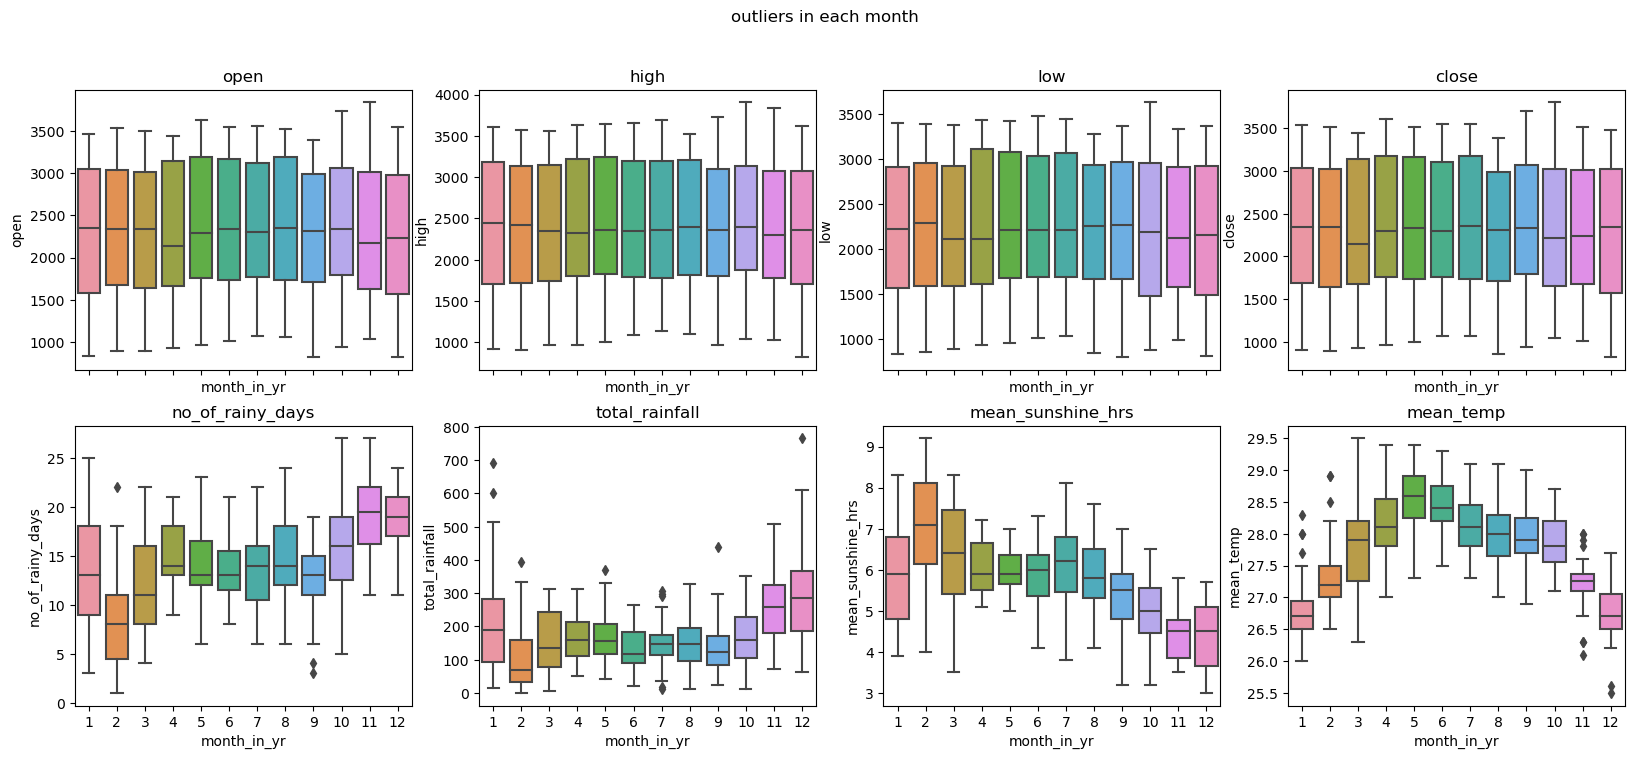

In [52]:
# plot box plot to check
fig, axes = plt.subplots(2, 4, figsize=(20, 8), sharex=True)
fig.suptitle('outliers in each month')
plot_lst = list(weather_sti_df.columns)
plot_lst.remove('year')
plot_lst.remove('month_in_yr')
plot_lst = [plot_lst[0:4], plot_lst[4:]]
for outer_idx, lst in enumerate(plot_lst):
    for inner_idx, item in enumerate(lst): 
        sns.boxplot(ax=axes[outer_idx,inner_idx], x=weather_sti_df['month_in_yr'], y=weather_sti_df[item])
        axes[outer_idx,inner_idx].set_title(item)

From the box plots, it is clear that there are outliers in the weather data.   
There's no outliers in STI data.  
It is also clear that STI data have a very large range.  
Analysis:  
You may not want to buy STI if you want to be rich overnight.   
If you are in for long term stable investment, maybe STI related funds suits you.   

It is clear that to get outlier by month as shown in the box plots, you will first need to group the data.  
Then you try to find the outliers.  

In [53]:
weather_sti_df_copy = weather_sti_df.copy(deep=True)

In [54]:
def remove_outlier_func(df, outlier_data, reset_index = False):
    '''
    remove the outlier from the dataframe
    args:
    df (DataFrame): source to remove the outliers
    outlier_data (dictionary): what values to remove and thier index
    reset_index (Boolean): if to reset the index
    out:
    df (DataFrame): DataFrame after the values in outlier_data are renmoved
    '''
    keys=outlier_data.keys()
    values = outlier_data.values()
    for key in keys:
        for value in outlier_data[key].index:
            df.drop(value, inplace=True)
            if reset_index:
                df.reset_index(drop=True, inplace=True)

In [55]:
def find_outlier_by_col(df, col, grpby):
    '''
    This function returns outlier based on how it is grouped.
    args:
    df (DataFrame): dataframe which the outliers are to be identified from
    col (string): title of the column which to identify the outlier
    grpby (string): title of the column to groupby
    out:
    outlier_data (dictionary): Outliers values found.
    '''
    series = df[col]
    idxs = df[grpby].unique()
    outlier_data = {}
    for idx in idxs:
        current_series = df[col].loc[df[grpby]==idx]
        q1 = current_series.quantile(0.25)
        q3 = current_series.quantile(0.75)
        interquartile_range = q3-q1
        out_btm = q1-(1.5*interquartile_range)
        out_top = q3+(1.5*interquartile_range)
        out = current_series.loc[lambda x : (x < out_btm) | (x > out_top)]
        if not out.empty:
            outlier_data[idx] = out
    return outlier_data
 

In [56]:
find_outlier_by_col(weather_sti_df, 'no_of_rainy_days', 'month_in_yr')

{2: 302    22
 Name: no_of_rainy_days, dtype: int64,
 9: 117    3
 381    4
 Name: no_of_rainy_days, dtype: int64}

`find_outlier_by_col` function here can help to find all outlier data.  
call this function to find other outliers in the dataset.  
For example, `no_of_rainy_days` have 3 outliers.  
1 is in Feb, index 302, with 22 days raining.  
2 are in Sep, index 117 with 3 rainy days and index 381 with 4 rainy days.

In [57]:
find_outlier_by_col(weather_sti_df, 'total_rainfall', 'month_in_yr')

{12: 228    765.9
 Name: total_rainfall, dtype: float64,
 1: 193    600.9
 397    692.8
 Name: total_rainfall, dtype: float64,
 2: 302    395.2
 Name: total_rainfall, dtype: float64,
 5: 125    370.8
 Name: total_rainfall, dtype: float64,
 7: 7      305.4
 55     290.8
 115     18.6
 271    298.5
 379     12.2
 Name: total_rainfall, dtype: float64,
 9: 9    440.4
 Name: total_rainfall, dtype: float64}

In [58]:
find_outlier_by_col(weather_sti_df, 'mean_temp', 'month_in_yr')

{12: 48    25.6
 60    25.5
 Name: mean_temp, dtype: float64,
 1: 121    28.0
 337    28.3
 373    28.0
 385    27.7
 Name: mean_temp, dtype: float64,
 2: 122    28.9
 206    28.5
 266    28.9
 Name: mean_temp, dtype: float64,
 11: 11     26.3
 47     26.3
 59     26.1
 119    27.8
 131    27.9
 335    28.0
 383    28.0
 Name: mean_temp, dtype: float64}

In [59]:
out = find_outlier_by_col(weather_sti_df_copy, 'no_of_rainy_days', 'month_in_yr')
print(out)

{2: 302    22
Name: no_of_rainy_days, dtype: int64, 9: 117    3
381    4
Name: no_of_rainy_days, dtype: int64}


In [60]:
remove_outlier_func(weather_sti_df_copy, out)

In [61]:
weather_sti_df_copy[300:305]

,year,month_in_yr,open,high,low,close,no_of_rainy_days,total_rainfall,mean_sunshine_hrs,mean_temp
301,2013,1,3188.59,3290.90,3160.83,3282.66,15,262.0,6.0,27.1
303,2013,3,3266.84,3321.62,3234.67,3308.10,10,85.8,7.5,28.3
304,2013,4,3313.37,3383.46,3264.08,3368.18,19,159.4,5.2,28.2
305,2013,5,3370.19,3464.79,3303.11,3311.37,17,211.4,5.4,28.2
306,2013,6,3287.10,3304.07,3065.42,3150.44,12,111.4,6.4,29.0


The `remove_outlier_func` can be called if outlier removal is needed.  
As can be seen from the snip of the `weather_sti_df_copy`, row 302 was removed.  
This shows the function `remove_outlier_func` is working as expected.  

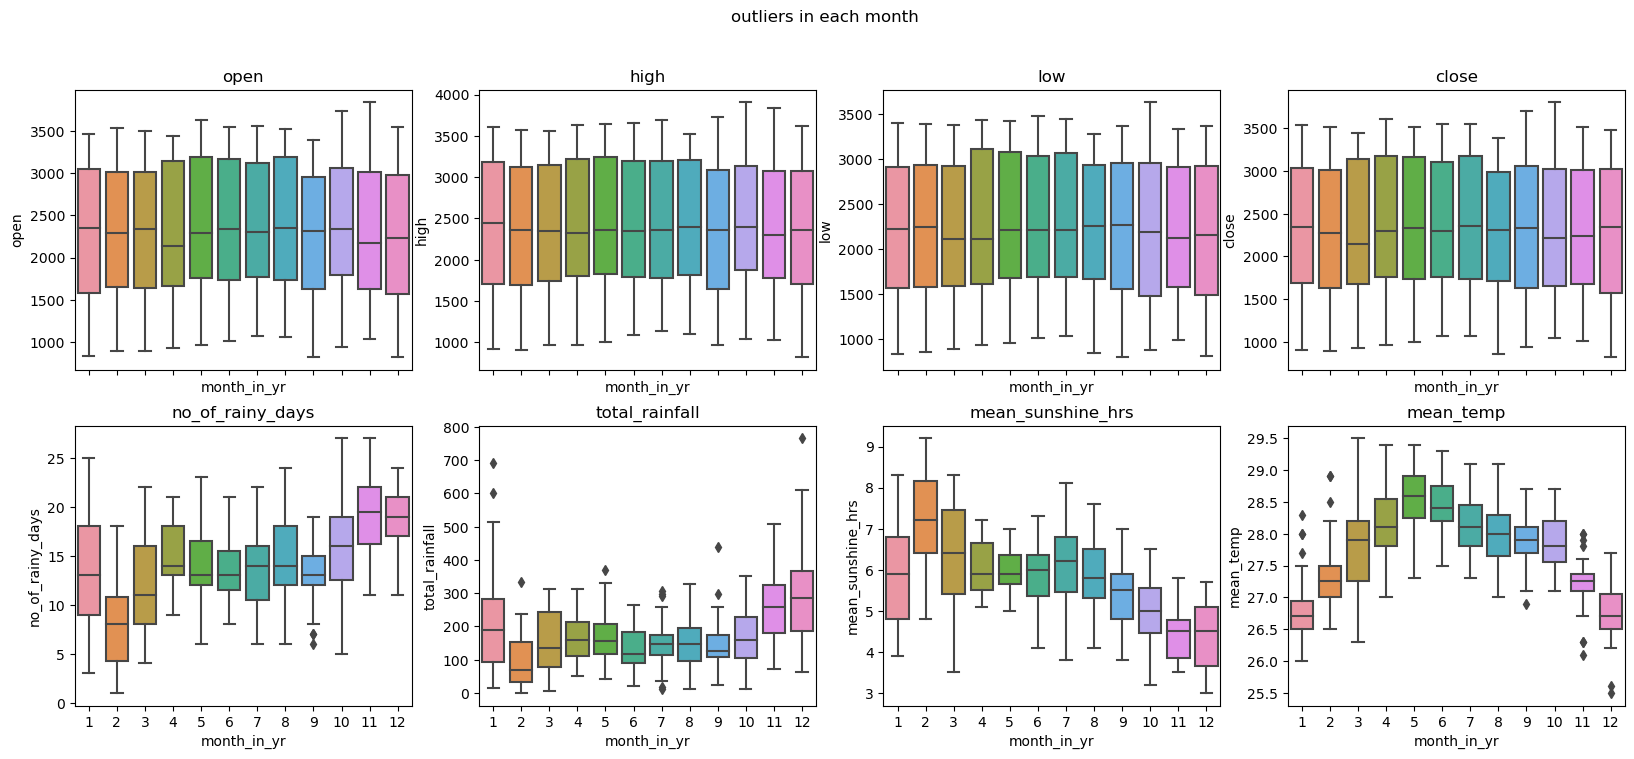

In [62]:
fig, axes = plt.subplots(2, 4, figsize=(20, 8), sharex=True)
fig.suptitle('outliers in each month')
plot_lst = list(weather_sti_df_copy.columns)
plot_lst.remove('year')
plot_lst.remove('month_in_yr')
plot_lst = [plot_lst[0:4], plot_lst[4:]]
for outer_idx, lst in enumerate(plot_lst):
    for inner_idx, item in enumerate(lst): 
        sns.boxplot(ax=axes[outer_idx,inner_idx], x=weather_sti_df_copy['month_in_yr'], y=weather_sti_df_copy[item])
        axes[outer_idx,inner_idx].set_title(item)

From the figure above, there are still outlier data points in `no_of_rainy_day`.  
This is simply because these are the new outlier data points after removal of the older outlier points.  

------------------
## Additional analysis  

As seen from previous analysis, outliers exists mainly in the weather datasets.    
Even so, the outliers are few. They are also *important*, as the data is a continous data based on time.   
The end of month STI does not contain outliers.  
This means that we should think twice before removing any "outliers" in the current dataset.   

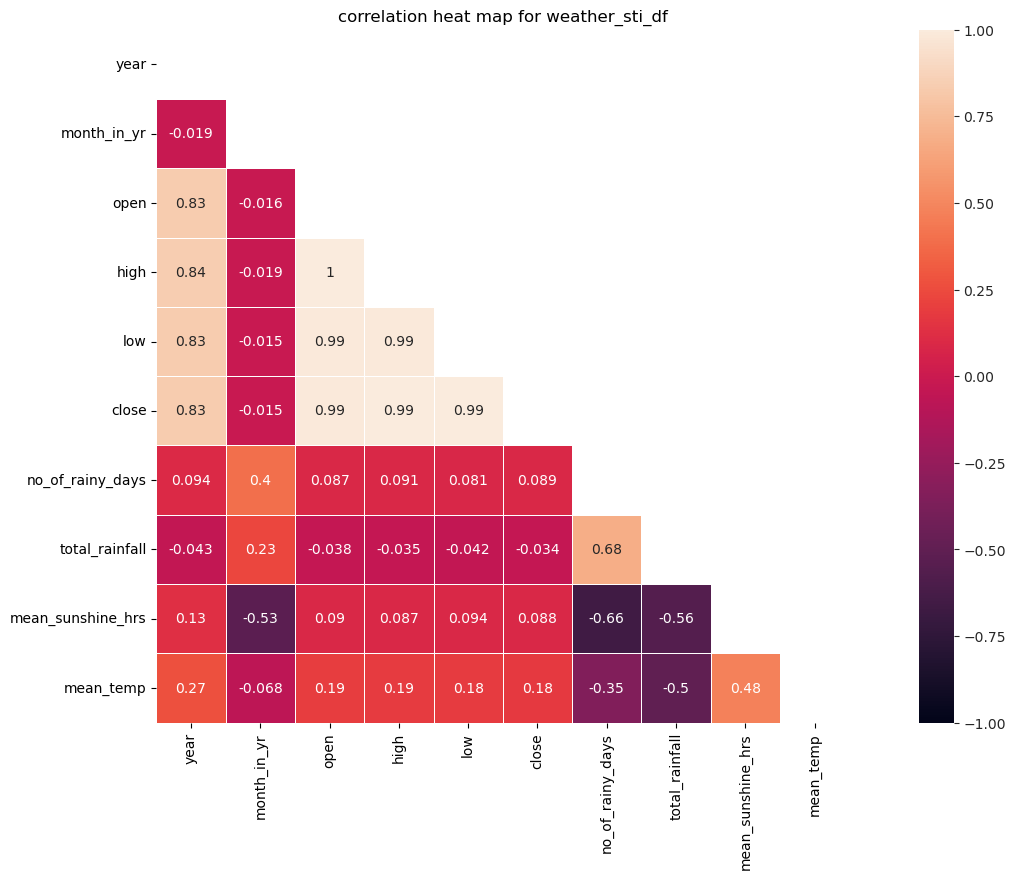

In [63]:
weather_sti_df_copy = weather_sti_df.copy(deep=True)
plt.figure(figsize = (18,9))
plt.title("correlation heat map for weather_sti_df")
# Get correlation of variables.
corr = weather_sti_df_copy.corr(numeric_only=True)
# Set up mask to be “True” in the upper triangle.
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
# Plot our correlation heatmap, while masking the upper triangle to be white.
with sns.axes_style("white"):
    sns.heatmap(corr, mask = mask, square = True, annot = True, vmin = -1, vmax = 1, linewidths = .5)

From correlation matrix above, it is clear that the four features for STI price is very similarly distributed.   
Hence, the 0.99 correlation, showing that they are very closely related.  
I might want to combine it by averaging it, as the numbers for STI performance are very close anyways.

In [64]:
weather_sti_df_copy['sti_end_month'] = weather_sti_df_copy[['open','high','low','close']].sum(axis=1)/4
weather_sti_df_copy.drop(columns=['open','high','low','close'], inplace=True)
weather_sti_df_copy.head()

,year,month_in_yr,no_of_rainy_days,total_rainfall,mean_sunshine_hrs,mean_temp,sti_end_month
0,1987,12,11,72.8,4.8,26.4,820.725
1,1988,1,15,237.5,5.9,26.8,875.050
2,1988,2,9,158.1,6.7,27.1,883.575
3,1988,3,15,186.8,5.2,27.3,918.975
4,1988,4,13,109.6,5.4,27.8,946.100


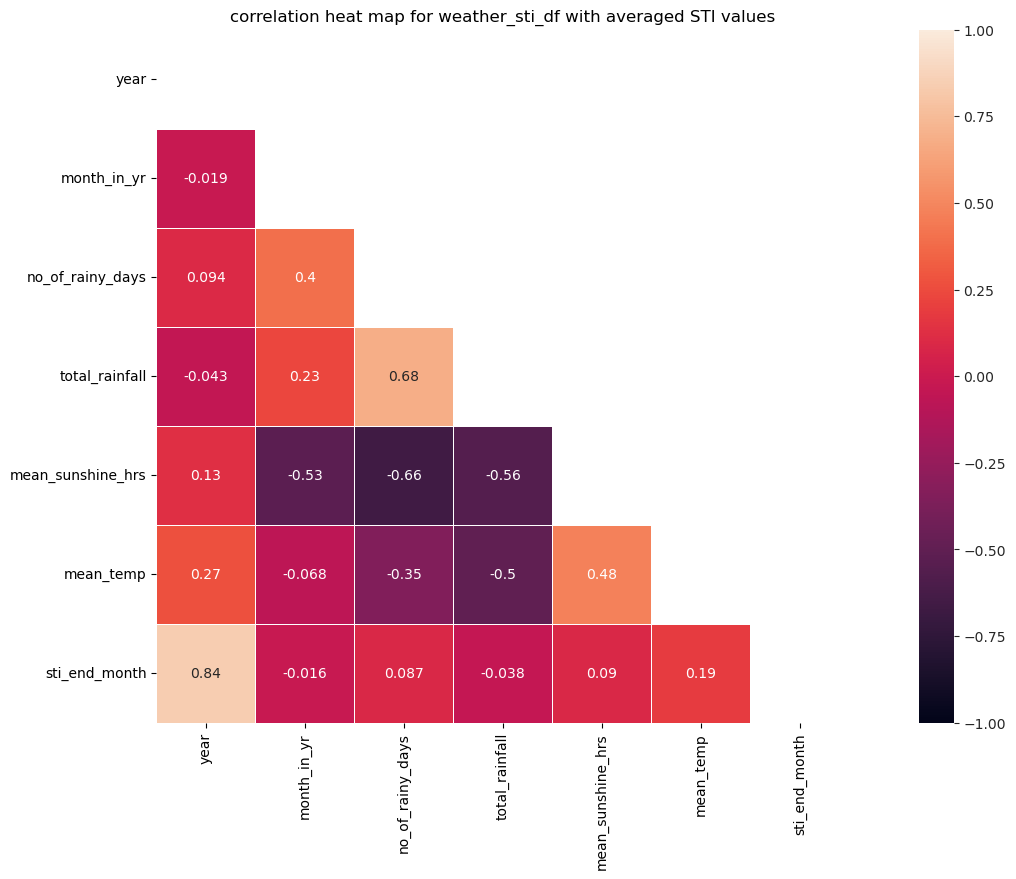

In [65]:
plt.figure(figsize = (18,9))
plt.title("correlation heat map for weather_sti_df with averaged STI values")
# Get correlation of variables.
corr = weather_sti_df_copy.corr(numeric_only=True)
# Set up mask to be “True” in the upper triangle.
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
# Plot our correlation heatmap, while masking the upper triangle to be white.
with sns.axes_style("white"):
    sns.heatmap(corr, mask = mask, square = True, annot = True, vmin = -1, vmax = 1, linewidths = .5)

We now see that there are some relations between `sti_end_month` and the features for weather, according to Pearson's R from correlation matrix.  
Next we examine the Person's R by conducting statistical tests on them.  

**Side step**  
STI are in the range of thousands, while weather data are in range of tens and hundreds.  
They are different by up to 2 orders of magnitude.  
This is very bad news should we use the original data for more indepth analysis and some magnitude sensitive machine learnning algorithms!   

Some Machine Learning algorithms are actually sensitive to scale of the data.  
It is thus a good idea to scale the data.   
This is only to prepare it for possible ML algorithms in the future.

The standard scaling, from my understanding, is forcing the distribution of data to be normally distributed in a bell curve shape.  
This is not what I want.  
I want to change the magnitude of the data.  
This is probably normalisation, or more specifically, Min Max Scaling.  
**It should be noted that Standardisation/ Min Max Scaling will not affect correlation, as correlation is invariant to Linear Transformations of data**  
If I want standardisation, then I will use `StandardScaler()`.

In [66]:
scaler = MinMaxScaler()
scaler.fit(weather_sti_df_copy)
min_max_scaled = scaler.transform(weather_sti_df_copy)
min_max_scaled_df = pd.DataFrame(min_max_scaled, columns = ['year', 'month_in_year', 'no_of_rainy_days', 'total_rainfall',
                                                            'mean_sunshine_hrs', 'mean_temp', 'sti_end_month' ])
# min_max_scaled_df can be used for magnitude sensitive, but distribution insensitive ML algo
min_max_scaled_df.head()

,year,month_in_year,no_of_rainy_days,total_rainfall,mean_sunshine_hrs,mean_temp,sti_end_month
0,0.000000,1.000000,0.384615,0.094815,0.290323,0.225,0.000000
1,0.028571,0.000000,0.538462,0.309912,0.467742,0.325,0.018420
2,0.028571,0.090909,0.307692,0.206217,0.596774,0.400,0.021311
3,0.028571,0.181818,0.538462,0.243699,0.354839,0.450,0.033314
4,0.028571,0.272727,0.461538,0.142876,0.387097,0.575,0.042511


In [67]:
def stocks_vs_weather(df, feature_1, feature_2, test='two-sided'):
    '''
    find the pearson's r and p value and 95% CI between two features.
    args:
    df (DataFrame): dataframe to examine
    feature_1 (str): title for 1st feature to be examined
    feature_2 (str): title for 2nd feature to be examined
    test (str): {‘two-sided’, ‘greater’, ‘less’} types of hypothesis test
    return:
    result (PearsonRResult): object with r value at index 0, p value at index 1
        and a method .confidence_interval(confidence_level=0.95) to find CI at 95%
    '''
    result = pearsonr(df[feature_1], df[feature_2], alternative=test)
    print("The pearson's r between {} and {} is: {}".format(feature_1, feature_2, result[0]))
    if (result[1] < 0.05):
        print("The correlation coefficient for these features is statistically significant.")
        print("The p value is: {}".format(result[1]))
        conf_inter = result.confidence_interval(confidence_level=0.95)
        print("95% confidence interval for the true correlation coefficient is from {} to {}.".format(conf_inter[0],conf_inter[1]))
        print("With a total of {} pairs of data points examined.".format(len(df[feature_1])))
    else:
        print("The p vlaue is: {}".format(result[1]))
        print("The correlation is not statistically significant with P > 5%.")
        print("With a total of {} pairs of data points examined".format(len(df[feature_1])))
    return result

In [68]:
stocks_vs_weather(weather_sti_df_copy, 'mean_temp', 'sti_end_month');

The pearson's r between mean_temp and sti_end_month is: 0.18500048417162993
The correlation coefficient for these features is statistically significant.
The p value is: 0.00013982534212253847
95% confidence interval for the true correlation coefficient is from 0.09080947282525943 to 0.27591091896171394.
With a total of 419 pairs of data points examined.


In [69]:
stocks_vs_weather(weather_sti_df_copy, 'mean_temp', 'sti_end_month', 'greater');

The pearson's r between mean_temp and sti_end_month is: 0.18500048417162993
The correlation coefficient for these features is statistically significant.
The p value is: 6.991267106126923e-05
95% confidence interval for the true correlation coefficient is from 0.10610894469284124 to 1.0.
With a total of 419 pairs of data points examined.


In [70]:
stocks_vs_weather(weather_sti_df_copy, 'mean_sunshine_hrs', 'sti_end_month');

The pearson's r between mean_sunshine_hrs and sti_end_month is: 0.09012608627555782
The p vlaue is: 0.06531790469149842
The correlation is not statistically significant with P > 5%.
With a total of 419 pairs of data points examined


Without assuming a direction for the correlation first, we can not reject null hypothesis.

In [71]:
stocks_vs_weather(weather_sti_df_copy, 'mean_sunshine_hrs', 'sti_end_month', 'greater');

The pearson's r between mean_sunshine_hrs and sti_end_month is: 0.09012608627555782
The correlation coefficient for these features is statistically significant.
The p value is: 0.03265895234574921
95% confidence interval for the true correlation coefficient is from 0.009725414539877266 to 1.0.
With a total of 419 pairs of data points examined.


After assuming a positive relation (assuming a direction of the relationship), we can reject the null hypothesis.  
However, this may not be valid, as we do not have any other evidence that supports that a positively correlated relationship exists between `mean_sunshin_hrs` and `sti_end_month`.   
I feel that unless we know before hand they are correlated, then we can use the above test to prove that this 2 features indeed show this sample also display our knowledge on the correlation.

In [72]:
stocks_vs_weather(weather_sti_df_copy, 'total_rainfall', 'sti_end_month', 'less');

The pearson's r between total_rainfall and sti_end_month is: -0.037548076463182076
The p vlaue is: 0.7783296735753615
The correlation is not statistically significant with P > 5%.
With a total of 419 pairs of data points examined


In [73]:
stocks_vs_weather(weather_sti_df_copy, 'no_of_rainy_days', 'sti_end_month', 'greater');

The pearson's r between no_of_rainy_days and sti_end_month is: 0.08733234175938212
The correlation coefficient for these features is statistically significant.
The p value is: 0.03707220396549282
95% confidence interval for the true correlation coefficient is from 0.0069096954566111885 to 1.0.
With a total of 419 pairs of data points examined.


In [74]:
stocks_vs_weather(weather_sti_df_copy, 'no_of_rainy_days', 'sti_end_month');

The pearson's r between no_of_rainy_days and sti_end_month is: 0.08733234175938212
The p vlaue is: 0.07414440793098565
The correlation is not statistically significant with P > 5%.
With a total of 419 pairs of data points examined


From the above r values and corresponding p value, we can say that there are some statistically significant relationship for:
 - `mean_temp` and `sti_end_month`  
 - `mean_sunshine_hrs` and `sti_end_month`  
 - `no_of_rainy_days` and `sti_end_month`     

There are no statistically siginifcant relationship between:
 - `total_rainfall` and `sti_end_month`

For the pairs:
 - `mean_sunshine_hrs` and `sti_end_month`
 - `no_of_rainy_days` and `sti_end_month`    

The null hypothesis H0 stating of correlations between datas are purely coincidental can be rejected, if the alternative hypothesis H1 is that there exists a positive relationship between the 2 features.  
However, if the alternative hypothesis H1 is correlation between the 2 features are none zero, the null hypothesis H0 can not be rejected.  
This is due to the nature of 2 tailed and 1 tailed tests.  
Since we should be uncertain on the direction of the correlation, I think a 2 tailed test is more reasonable.  

So I am going to conclude that:
 - `mean_sunshine_hrs`  
 - `no_of_rainy_days`  
 - `total_rainfall`  
 
Are just showing the correlation with `sti_end_month` by pure chance.

For the pair:
 - `mean_temp` and `sti_end_month`  

Both 2 tailed test and positive single tailed test rejects the null hypothesis that there is no statistically significant relationship/ no positively correlated relationship.  
This means mean temperture is likely related to the the average value for STI at the end of the month.  
Of course, **correlation does not mean causation**. The two features are just positively related in some way.    
We can make some educated guess at what is happening. (If we look into other data.)

The comments below are just pondering during this long workflow.  
Maybe the hotter temperature makes investors more impulsive and decide to invest more, resulting in higher average value for STI. (Not likely)   
Maybe a general increase in STI shows that the market is doing well. This corresponds to more economic activities. Which may cause heat generation from air-conditioners, factories or carbon production which warms up the temperature.   

Some more additional questions I want to answer:
 - what does the graph of temperature vs STI at end of month look like?
 - does the mean_temp increase, decrease or remain constant over the years?
 - what about total_rainfall and all the other features?


In [75]:
weather_sti_df_copy.drop(columns = ['month_in_yr'], inplace=True)
# group by year to observe change across years
grp_by_year = weather_sti_df_copy.groupby('year')
grp_by_yr_res = grp_by_year.agg([np.mean]).round(1)
grp_by_yr_res.columns = [col[0] for col in grp_by_yr_res.columns.values]
display(grp_by_yr_res.head())

,no_of_rainy_days,total_rainfall,mean_sunshine_hrs,mean_temp,sti_end_month
year,,,,,
1987,11.0,72.8,4.8,26.4,820.7
1988,14.4,216.6,5.4,27.2,997.8
1989,14.4,205.3,5.5,26.9,1283.2
1990,11.8,127.0,6.2,27.6,1392.0
1991,12.2,156.4,5.4,27.4,1435.4


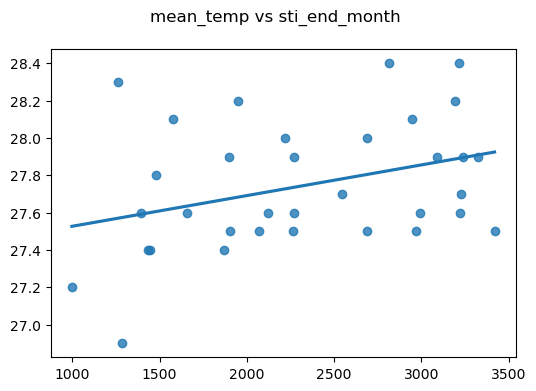

In [76]:
# plot mean_temp vs STI at end of month
fig = plt.figure(figsize = (6,4))
temp_vs_sti = sns.regplot(x=list(grp_by_yr_res[1:-1]['sti_end_month']), y=list(grp_by_yr_res[1:-1]['mean_temp']), ci=None)
fig.suptitle('mean_temp vs sti_end_month');

This plot also indicates that `mean_temp` and `sti_end_month` have a positive relationship.

### Yearly plot

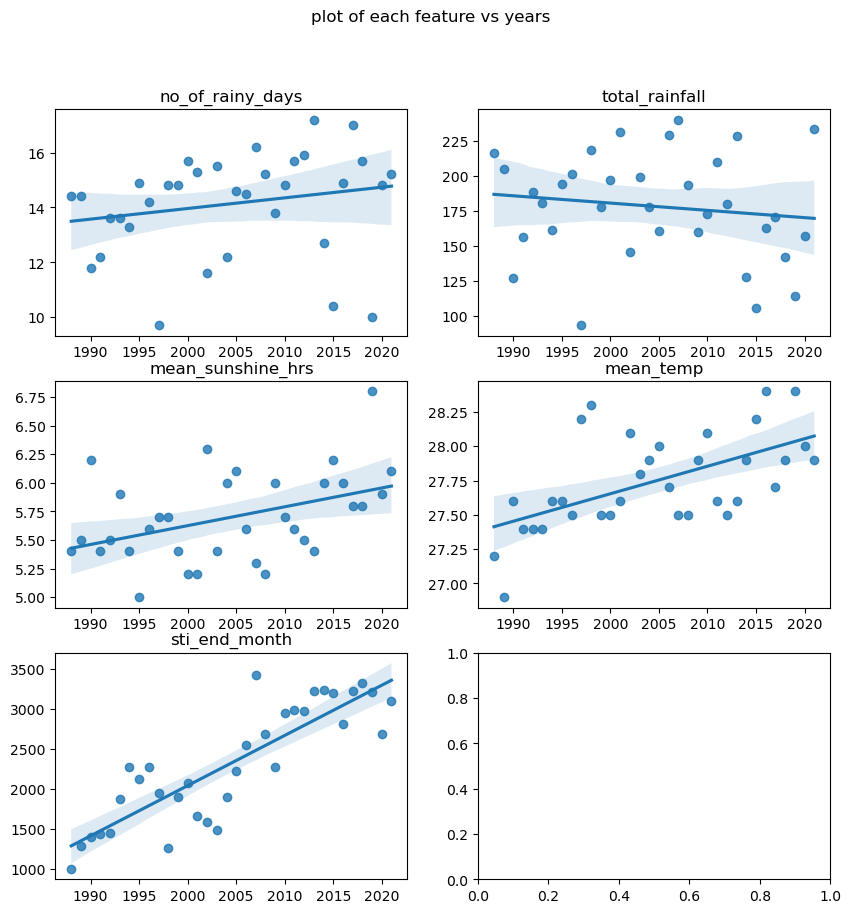

In [77]:
# a overall plot that shows the relationship between the data points and year

fig, axes = plt.subplots(3, 2, figsize=(10,10))
fig.suptitle('plot of each feature vs years')
plot_lst = list(grp_by_yr_res.columns)
plot_lst = [plot_lst[0:2], plot_lst[2:4], [plot_lst[4]]]
x_vals = list(range(1988,2022))

for outer_idx, lst in enumerate(plot_lst):
    for inner_idx, item in enumerate(lst): 
        sns.regplot(ax=axes[outer_idx,inner_idx], x=x_vals, y=list(grp_by_yr_res[1:-1][item]))
        axes[outer_idx,inner_idx].set_title(item)

From the plotted graphs, it can be seen that:  
    - `no_of_rainy_days`
    - `mean_sunshine_hrs`
    - `mean_temp`
    - `sti_end_month`  
All showed an increasing trend as the year increases.  
While  
    - `total_rainfall`  
decreases as the year increases.  
However, only the confidence interval (light blue shaded region) for linear regression line of `mean_temp` and `sti_end_month` are small, just by observation.  
This means that this two have a clear upward trend as years increase.  
The other features are not so obvious.

Additional analysis can be done using the `grp_by_yr_res` dataframe and the `stocks_vs_weather` function.  
We will have to save the `year` index as a column, and we can use `stocks_vs_weather` function for analysis.  

In [78]:
grp_by_yr_res = grp_by_yr_res.reset_index(level=0)

In [79]:
grp_by_yr_res = grp_by_yr_res.iloc[1:-1, :] # Takes out the 1st and last entry as they are incomplete.
grp_by_yr_res.head()

,year,no_of_rainy_days,total_rainfall,mean_sunshine_hrs,mean_temp,sti_end_month
1,1988,14.4,216.6,5.4,27.2,997.8
2,1989,14.4,205.3,5.5,26.9,1283.2
3,1990,11.8,127.0,6.2,27.6,1392.0
4,1991,12.2,156.4,5.4,27.4,1435.4
5,1992,13.6,188.4,5.5,27.4,1447.2


In [80]:
test_lst = list(grp_by_yr_res.columns[1:])
for feature in test_lst:
    print("-----{}-----".format(feature))
    stocks_vs_weather(grp_by_yr_res, 'year', feature)
    print("------------")

-----no_of_rainy_days-----
The pearson's r between year and no_of_rainy_days is: 0.206895367745826
The p vlaue is: 0.24038365751560895
The correlation is not statistically significant with P > 5%.
With a total of 34 pairs of data points examined
------------
-----total_rainfall-----
The pearson's r between year and total_rainfall is: -0.13575142583238684
The p vlaue is: 0.4439701540876507
The correlation is not statistically significant with P > 5%.
With a total of 34 pairs of data points examined
------------
-----mean_sunshine_hrs-----
The pearson's r between year and mean_sunshine_hrs is: 0.423921519425536
The correlation coefficient for these features is statistically significant.
The p value is: 0.01247228183643087
95% confidence interval for the true correlation coefficient is from 0.10010668768797151 to 0.6665355376091138.
With a total of 34 pairs of data points examined.
------------
-----mean_temp-----
The pearson's r between year and mean_temp is: 0.5769977658337969
The corre

From the results, we can see that three features:  
 - `mean_sunshine_hrs`
 - `mean_temp`
 - `sti_end_month`  

Actually have a statistically significant relationship with feature `year`.

## Data visualisation

Contents:  
[distribution of individual features](#Individual-distribution)   
[monthly distribution](#Monthly-distribution)   
[yearly distribution](#Yearly-distribution)   
[overall relationships](#Overall-relation)  
[correlated vairables](#Correlated-variables)

## Visualize the Data

There's not a magic bullet recommendation for the right number of plots to understand a given dataset, but visualizing your data is *always* a good idea. Not only does it allow you to quickly convey your findings (even if you have a non-technical audience), it will often reveal trends in your data that escaped you when you were looking only at numbers. It is important to not only create visualizations, but to **interpret your visualizations** as well.

**Every plot should**:
- Have a title
- Have axis labels
- Have appropriate tick labels
- Text is legible in a plot
- Plots demonstrate meaningful and valid relationships
- Have an interpretation to aid understanding

Here is an example of what your plots should look like following the above guidelines. Note that while the content of this example is unrelated, the principles of visualization hold:

![](https://snag.gy/hCBR1U.jpg)
*Interpretation: The above image shows that as we increase our spending on advertising, our sales numbers also tend to increase. There is a positive correlation between advertising spending and sales.*

---

Here are some prompts to get you started with visualizations. Feel free to add additional visualizations as you see fit:
1. Use Seaborn's heatmap with pandas `.corr()` to visualize correlations between all numeric features.
    - Heatmaps are generally not appropriate for presentations, and should often be excluded from reports as they can be visually overwhelming. **However**, they can be extremely useful in identify relationships of potential interest (as well as identifying potential collinearity before modeling).
    - Please take time to format your output, adding a title. Look through some of the additional arguments and options. (Axis labels aren't really necessary, as long as the title is informative).
2. Visualize distributions using histograms. If you have a lot, consider writing a custom function and use subplots.
    - *OPTIONAL*: Summarize the underlying distributions of your features (in words & statistics)
         - Be thorough in your verbal description of these distributions.
         - Be sure to back up these summaries with statistics.
         - We generally assume that data we sample from a population will be normally distributed. Do we observe this trend? Explain your answers for each distribution and how you think this will affect estimates made from these data.
3. Plot and interpret boxplots. 
    - Boxplots demonstrate central tendency and spread in variables. In a certain sense, these are somewhat redundant with histograms, but you may be better able to identify clear outliers or differences in IQR, etc.
    - Multiple values can be plotted to a single boxplot as long as they are of the same relative scale (meaning they have similar min/max values).
    - Each boxplot should:
        - Only include variables of a similar scale
        - Have clear labels for each variable
        - Have appropriate titles and labels
4. Plot and interpret scatter plots to view relationships between features. Feel free to write a custom function, and subplot if you'd like. Functions save both time and space.
    - Your plots should have:
        - Two clearly labeled axes
        - A proper title
        - Colors and symbols that are clear and unmistakable
5. Additional plots of your choosing.
    - Are there any additional trends or relationships you haven't explored? Was there something interesting you saw that you'd like to dive further into? It's likely that there are a few more plots you might want to generate to support your narrative and recommendations that you are building toward. **As always, make sure you're interpreting your plots as you go**.

Some ideas for plots that can be generated:

- Plot the histogram of the rainfall data with various bins and comment on the distribution of the data - is it centered, skewed?
- Plot the box-and-whiskers plot. Comment on the different quartiles and identify any outliers in the dataset. 
- Is there a correlation between the number of rainy days and total rainfall in the month? What kind of correlation do your suspect? Does the graph show the same?


## Individual distribution

In [81]:
# Copy the DataFrame again
weather_sti_df_copy = weather_sti_df.copy(deep=True)
# Reduce the number of varibales for simpler analysis
weather_sti_df_copy['sti_end_month'] = weather_sti_df_copy[['open','high','low','close']].sum(axis=1)/4
weather_sti_df_copy.drop(columns=['open','high','low','close'], inplace=True)
weather_sti_df_copy.head()

,year,month_in_yr,no_of_rainy_days,total_rainfall,mean_sunshine_hrs,mean_temp,sti_end_month
0,1987,12,11,72.8,4.8,26.4,820.725
1,1988,1,15,237.5,5.9,26.8,875.050
2,1988,2,9,158.1,6.7,27.1,883.575
3,1988,3,15,186.8,5.2,27.3,918.975
4,1988,4,13,109.6,5.4,27.8,946.100


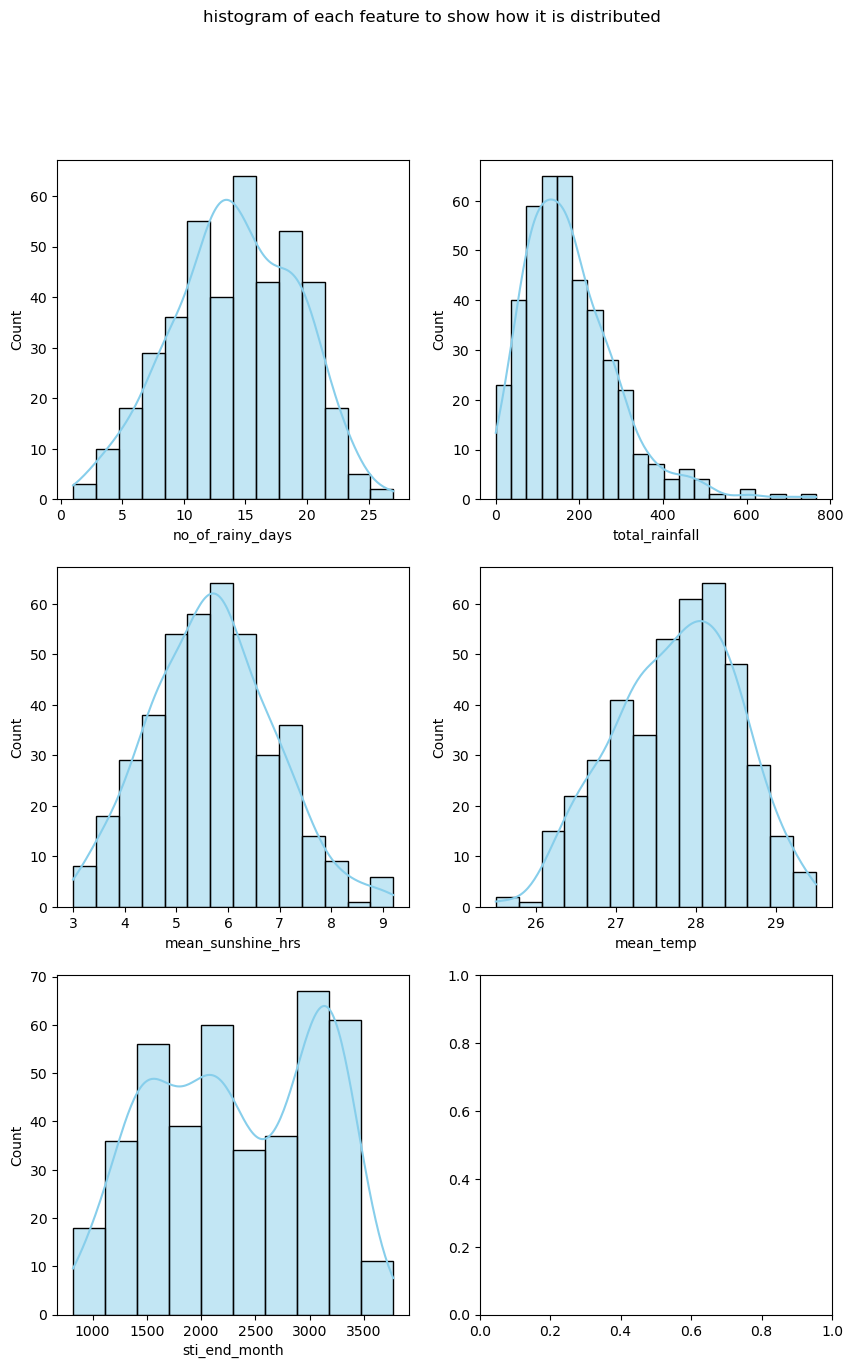

In [82]:
# How each feature is distributed? 
fig, axes = plt.subplots(3, 2, figsize=(10,15))
fig.suptitle('histogram of each feature to show how it is distributed')
plot_lst = list(weather_sti_df_copy.columns)[2:]
plot_lst = [plot_lst[0:2], plot_lst[2:4], [plot_lst[4]]]

for outer_idx, lst in enumerate(plot_lst):
    for inner_idx, item in enumerate(lst): 
        sns.histplot(data=weather_sti_df_copy, x=item, kde=True, color="skyblue", ax=axes[outer_idx, inner_idx])

From the histogram plots, we can see very clearly how the data points are distributed.  
 - `no_of_rainy_days`, `mean_sunshine_hrs` and `mean_temp` is distributed in a beautiful bell curve that is mostly centered. Hence, I feel that they are largely normally distributed.
 - `total_rainfall` is very obviously right skewed.
 - `sti_end_month` have 2 peaks as well.   
 
These distributions tell me that rainfall and mean temperature is pretty nicely normally distributed in Singapore.   
Total rainfall for a month is typically below 200 mm, but there tends to have some extreme cases.  
STI have some concentration around 2000 and 3000, but not 2500. This may mean that there's a point in time that STI revisited 2000 points and rebounded quicklya nd continued to grow into the 3000 region.

## Monthly distribution

This part was covered in my previous analysis in EDA section.  
Please click this [link](#Are-there-any-outliers-in-the-dataset-when-grouped-by-months?) to go to the previous box plot with STI features as seperate values.
The plot below is for averaged end of the month STI values.


Box plots are very useful in finding the outliers, as it indicates the different quartiles very clearly.

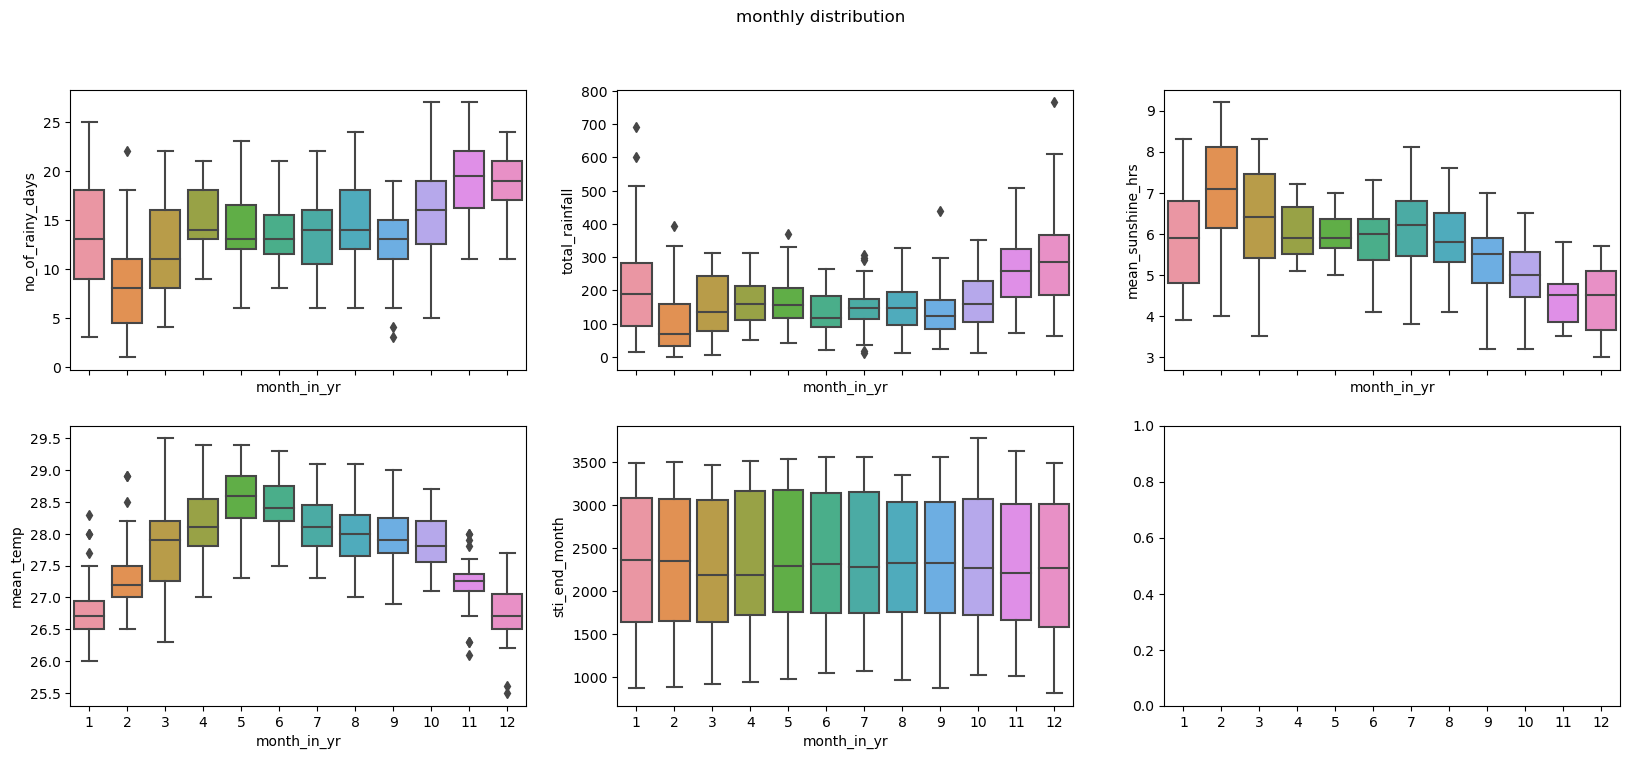

In [83]:
fig, axes = plt.subplots(2, 3, figsize=(20, 8), sharex=True)
fig.suptitle('monthly distribution')
plot_lst = list(weather_sti_df_copy.columns)
plot_lst.remove('year')
plot_lst.remove('month_in_yr')
plot_lst = [plot_lst[0:3], plot_lst[3:]]
for outer_idx, lst in enumerate(plot_lst):
    for inner_idx, item in enumerate(lst): 
        sns.boxplot(ax=axes[outer_idx,inner_idx], x=weather_sti_df_copy['month_in_yr'], y=weather_sti_df_copy[item])

Ignoring Feb, it is obvious that Nov and Dec have the highest number of rainy days.   
Jan have the largest range, meaning the variation across years is large.  
Nov and Dec stands out as having more total rainfall and the least sunshine hours too.  
Not surprsingly, Jan, Feb, Nov and Dec are all chiller compared to months like April, May, June, July.  


## Yearly distribution

Similarly the plot for [features vs years](#Yearly-plot) were displayed in the sections before.   
Click the link above to look at it reference.

## Overall relation

How the data looks like when plotted against one another is displayed below.   
This may be a quick way to observe any obvious relationships by just looking at the data.  
For heat map descirbing the linear relationship Pearson's R between the variables, see [above](#Additional_analysis).

Text(0.5, 0.98, 'Pairplot at the lower triangle and kde for diagonals')

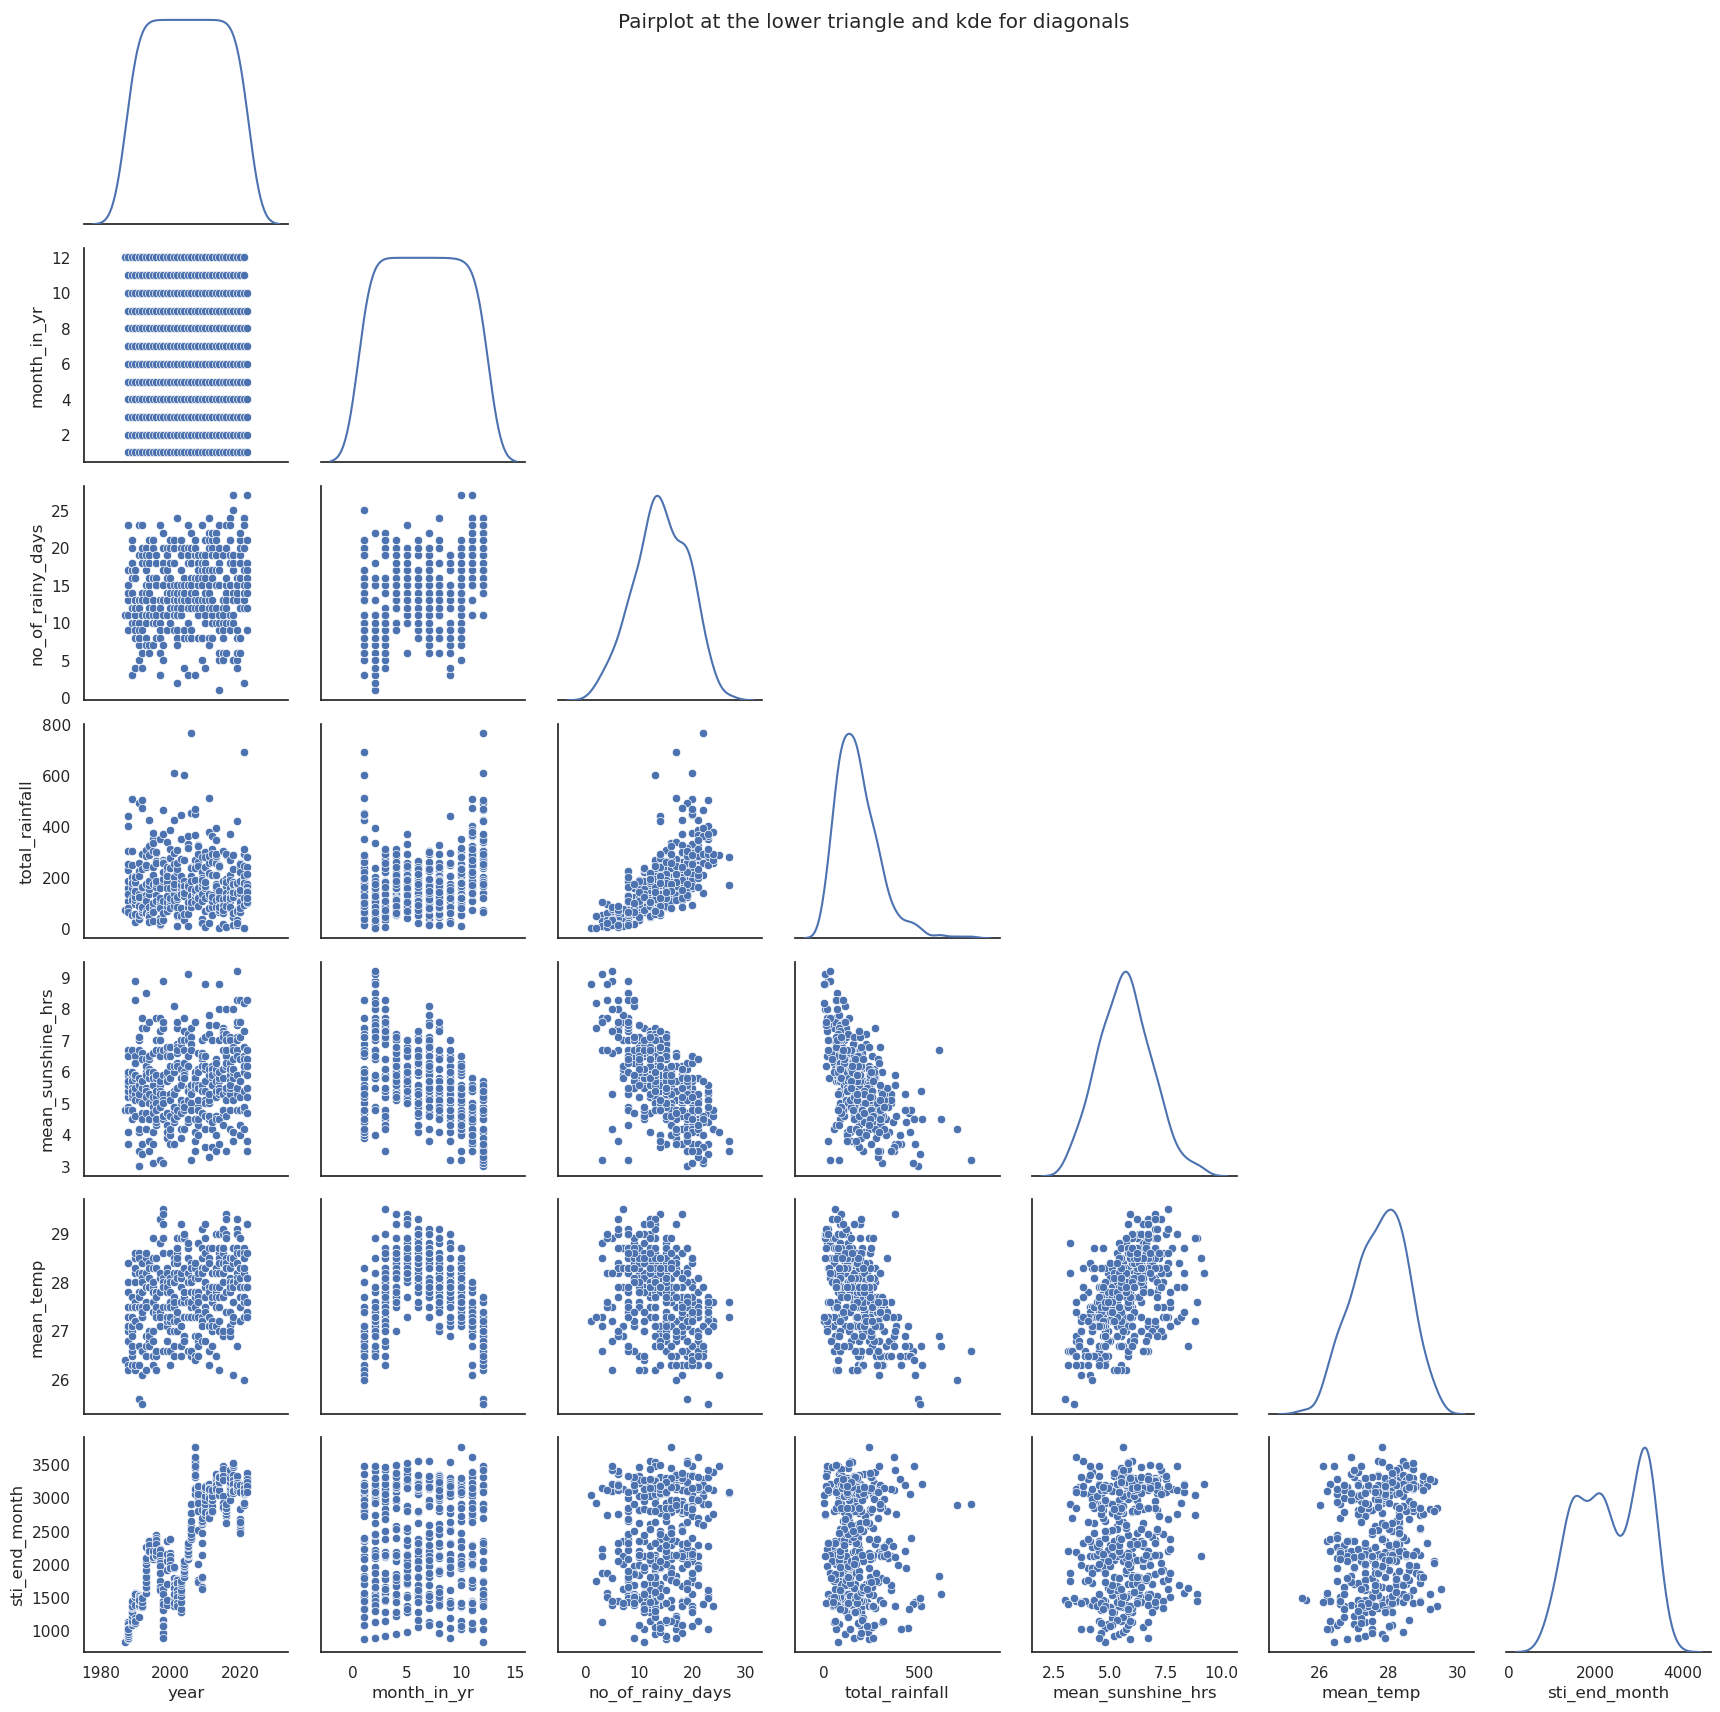

In [84]:
# Draw the pair plot

sns.set_theme(style="white")
g = sns.PairGrid(weather_sti_df_copy, diag_sharey=False, corner = True)
g.map_lower(sns.scatterplot)
g.map_diag(sns.kdeplot)
g.fig.suptitle("Pairplot at the lower triangle and kde for diagonals")

By power of observation (eyeballing), we can see a few trends:
 - `sti_end_month` nad `year` is psoitively correlated
 - all features shows great variance across the 12 months. However, it can be seen that the `mean_temp` is highest during March, April, May period, and is lower during the Nov and Dec periods.
 - `total_rainfall` shows a positive linear relationship with `no_of_rainy_days`, while `mean_temp` and `mean_sunshine_hrs` show a negative linear relationship with `no_of_rainy_days`.
 - `mean_temp` and `mean_sunshine_hrs` show a negative linear relationship with `total_rainfall`.
 - `mean_temp` and `mean-sunshine_hrs` show a positive linear relationship with eachother. 
 - Although we previously found some statistically significant relationship between `mean_temp` and `sti_end_month`, the graph looks like a mess with no clear trend.


## Correlated variables

Some variables are very clearly correlated. Such as:   
 - `total_rainfall` vs `no_of_rainy_days`  
 - `mean_sunshine_hrs` vs `total_rainfall`  
 - `mean_temp` vs `mean_sunshine_hrs`  

Scatter plot will be displayed below to illustrate this.

In [85]:
# Note: This is not a regression plot. For regression plot, visit Yearly distribution section above
def scatter_plot(df, x_title, y_title, find_r=False):
    fig = plt.figure(figsize = (6,4))
    sns.scatterplot(x=df[x_title], y=df[y_title])
    fig.suptitle(y_title+" vs "+x_title)
    if find_r:
        stocks_vs_weather(df, x_title, y_title)
        

The pearson's r between total_rainfall and no_of_rainy_days is: 0.6842155953479931
The correlation coefficient for these features is statistically significant.
The p value is: 3.8205210540382286e-59
95% confidence interval for the true correlation coefficient is from 0.6296901857427554 to 0.7320326455780607.
With a total of 419 pairs of data points examined.


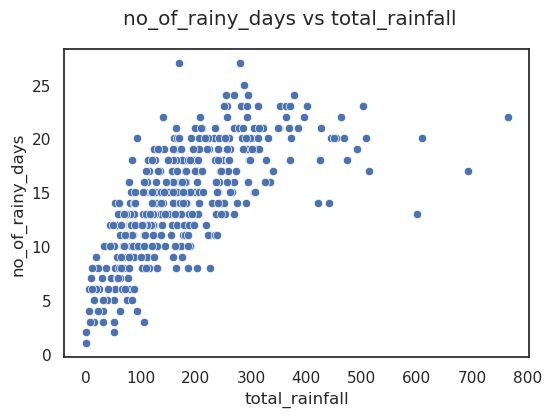

In [86]:
scatter_plot(weather_sti_df_copy, 'total_rainfall', 'no_of_rainy_days', find_r=True)

The pearson's r between mean_sunshine_hrs and total_rainfall is: -0.5596676696075645
The correlation coefficient for these features is statistically significant.
The p value is: 6.559546890816805e-36
95% confidence interval for the true correlation coefficient is from -0.6221126621619714 to -0.4901471608161186.
With a total of 419 pairs of data points examined.


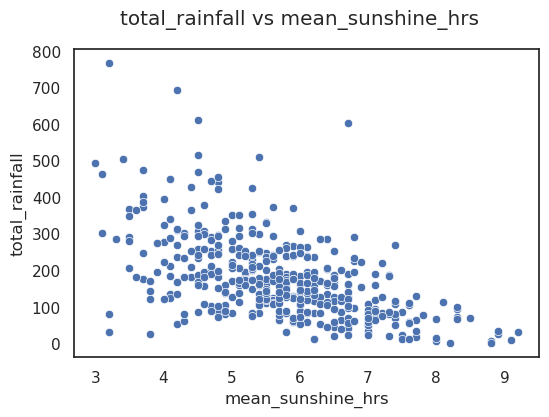

In [87]:
scatter_plot(weather_sti_df_copy, 'mean_sunshine_hrs', 'total_rainfall', find_r=True)

The pearson's r between mean_temp and mean_sunshine_hrs is: 0.4757318034698243
The correlation coefficient for these features is statistically significant.
The p value is: 4.739509534283915e-25
95% confidence interval for the true correlation coefficient is from 0.39807369874801174 to 0.5466198695572183.
With a total of 419 pairs of data points examined.


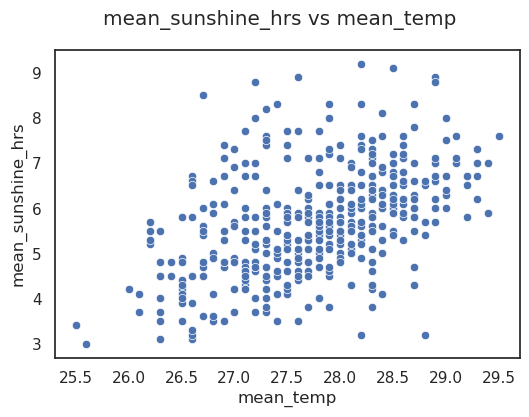

In [88]:
scatter_plot(weather_sti_df_copy, 'mean_temp', 'mean_sunshine_hrs', find_r=True)

From the scatter plots above, we can see that the data points look somewhat correlated.  
To confirm the theory, the r value and p values are calculated for each pair.  
From calculation, it seems all these values are indeed correlated.  
Once again, correlation **does not mean causation**.

## Conclusions and Recommendations

Based on your exploration of the data, what are you key takeaways and recommendations? Make sure to answer your question of interest or address your problem statement here.

The data quality from the various sources are very clean, with no missing data located in the datasets themselves.  
There ammount of data avaliable is limited by the ammount of STI values obtained from online sources.   
A total of 419 data point, starting from Dec 1987, ending on Oct 2022 is generated.  
This dataset contains a 4 weather features, as well as 4 features indicating how the STI performed at the very last day of the month.  

Most of these features shows a large degree of normal distribution amongst values for that feature.  
Number of rainy days per month, sunshine hours and mean daily temperature for the month showed distinct characteristics for each month.  
For example, hottest months are May and June, coldest months are Nov, Dec.   
This trend also happens to correspond with the rain datas.   


Also, perhaps the most interesting finding in this project is the correlation between `mean_temp` and `sti_end_month`.  
They have a pearson's r value of 0.18, and a p value of less than 0.05 for both 2 tailed and 1 tailed test.  
This proves that they are somewhat correlated. The possible explanations were ellaborated in the [additional analysis](#Additional-analysis) section.

Other possible relationships were also throughly examined and visual display of the results can be found in [datat visualisation](#Data-visualisation) section.  

To further this study, more weatherfeatures related to temperature can be added, to examine the relationship between temperature, weather and STI.